In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import gc

plt.style.use('plot_style.txt')

gc.collect()

data_2018 = pd.read_csv("microdados_ed_basica_2018.csv", sep=";",encoding = 'unicode_escape')
data_2019 = pd.read_csv("microdados_ed_basica_2019.csv", sep=";",encoding = 'unicode_escape')
data_2020 = pd.read_csv("microdados_ed_basica_2020.CSV", sep=";",encoding = 'unicode_escape')
data_2021 = pd.read_csv("microdados_ed_basica_2021.csv", sep=";",encoding = 'unicode_escape')
data_2022 = pd.read_csv("microdados_ed_basica_2022.csv", sep=";",encoding = 'unicode_escape')
dados_cidade = pd.read_csv("https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/estados.csv", sep=",")

# data = data[ (data['IN_BIBLIOTECA']>0.1) ]
len(data_2022.index)
#dados_cidade

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


224649

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   SG_UF  NU_ANO_CENSO  QTD_BIBLIOS  UF_PERCENT
0     AC           639           30    4.694836
1     AL           580          262   45.172414
2     AM          2738          599   21.877283
3     AP           233          126   54.077253
4     BA          3127         1323   42.308922
5     CE          2434          906   37.222679
6     DF           194           64   32.989691
7     ES           824          608   73.786408
8     GO          1304         1046   80.214724
9     MA          3817          603   15.797747
10    MG          4316         3844   89.063948
11    MS           650          383   58.923077
12    MT          1132          750   66.254417
13    PA          3678          819   22.267537
14    PB           963          551   57.217030
15    PE          1536         1010   65.755208
16    PI          1279          327   25.566849
17    PR          1917         1779   92.801252
18    RJ          2099         1098   52.310624
19    RN           801          531   66

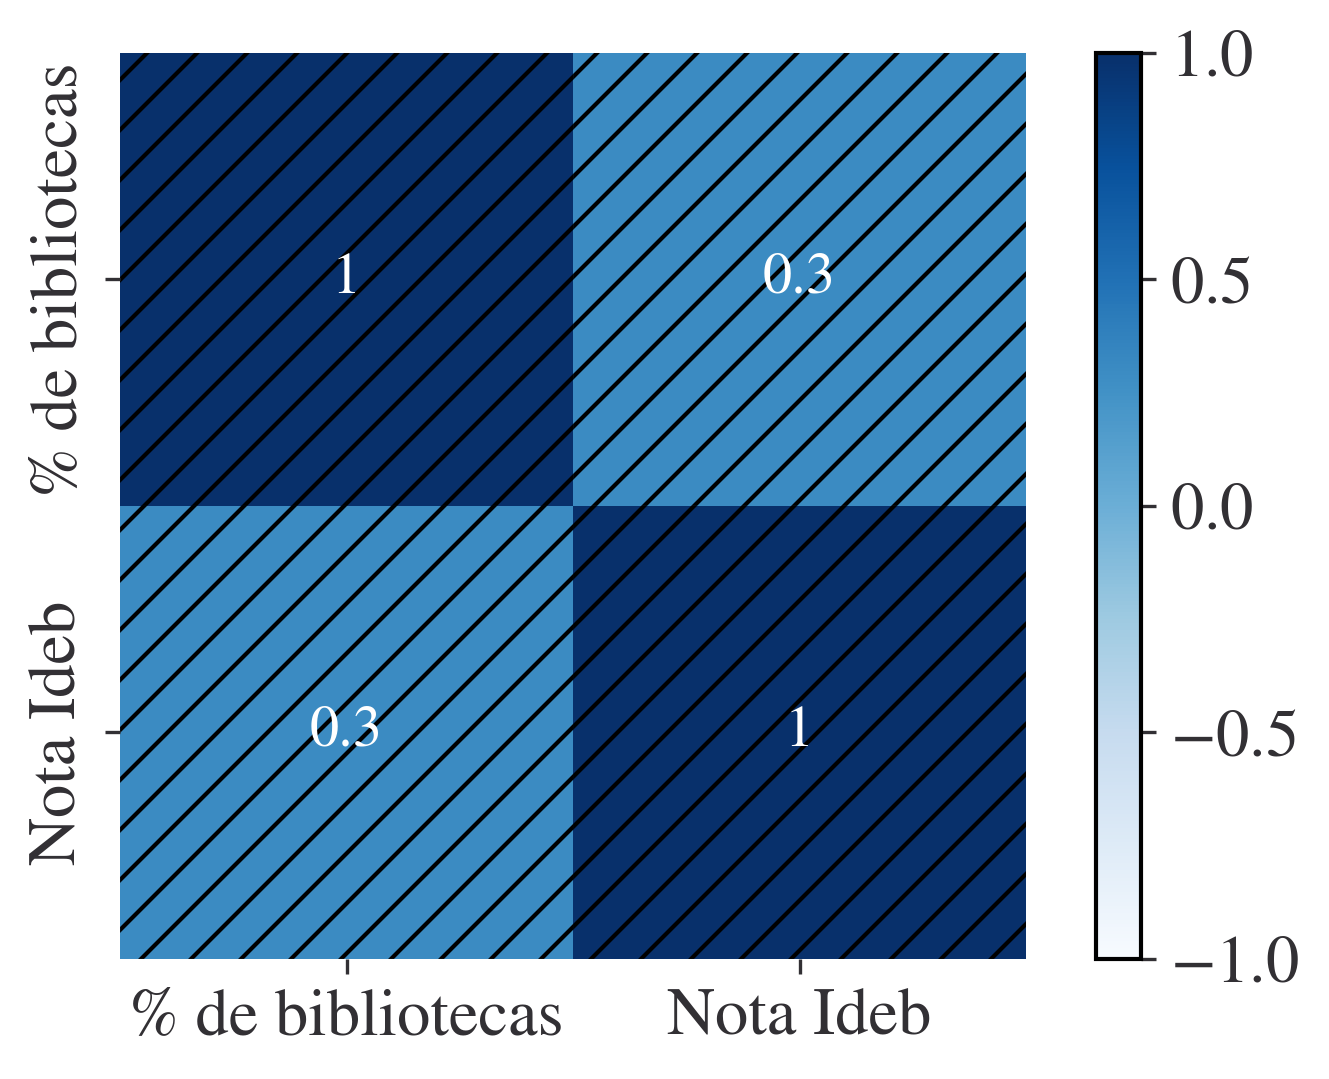

<Figure size 1800x1200 with 0 Axes>

In [20]:
'''
  NAO USAR ISTO, EH SO UM TESTE!!!!!
'''
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import gc

plt.style.use('plot_style.txt')

gc.collect()

data_2022 = pd.read_csv("microdados_ed_basica_2022.csv", sep=";",encoding = 'unicode_escape')

## 0. Dropa colunas inúteis
lista_exclusao = [
    'QT_DOC_BAS','QT_DOC_INF',
'QT_DOC_INF_CRE','QT_DOC_INF_PRE','QT_DOC_FUND','QT_DOC_FUND_AI',
'QT_DOC_FUND_AF','QT_DOC_MED','QT_DOC_PROF','QT_DOC_PROF_TEC',
'QT_DOC_EJA','QT_DOC_EJA_FUND','QT_DOC_EJA_MED','QT_DOC_ESP','QT_DOC_ESP_CC',
'QT_DOC_ESP_CE','IN_INF','IN_INF_CRE','IN_INF_PRE','IN_FUND',
'IN_FUND_AI','IN_FUND_AF','IN_MED','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE',
'IN_MEDIACAO_PRESENCIAL','IN_MEDIACAO_SEMIPRESENCIAL',
'IN_MEDIACAO_EAD','IN_REGULAR','IN_DIURNO','IN_NOTURNO',
'IN_EAD','IN_BAS','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_ESCOLARIZACAO','IN_BRASIL_ALFABETIZADO',
'IN_FINAL_SEMANA','IN_EXAME_SELECAO','IN_RESERVA_PPI','IN_RESERVA_RENDA',
'IN_RESERVA_PUBLICA','IN_RESERVA_PCD','IN_RESERVA_OUTROS','IN_RESERVA_NENHUMA',
'IN_REDES_SOCIAIS','IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES',
'IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','IN_SERIE_ANO','IN_PERIODOS_SEMESTRAIS','IN_FUNDAMENTAL_CICLOS',
'IN_GRUPOS_NAO_SERIADOS','IN_MODULOS','IN_FORMACAO_ALTERNANCIA','IN_MATERIAL_PED_MULTIMIDIA',
'IN_MATERIAL_PED_INFANTIL','IN_MATERIAL_PED_CIENTIFICO','IN_MATERIAL_PED_DIFUSAO',
'IN_MATERIAL_PED_MUSICAL','IN_MATERIAL_PED_JOGOS','IN_MATERIAL_PED_ARTISTICAS','IN_MATERIAL_PED_PROFISSIONAL','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM',
'IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA','IN_MATERIAL_ESP_NAO_UTILIZA','QT_COMPUTADOR',
'QT_COMP_ADMINISTRATIVO','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO',
'QT_EQUIP_VIDEOCASSETE','QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA',
'QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO','QT_COMP_ALUNO','IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_BANHEIRO_DENTRO_PREDIO',
'IN_BERCARIO','IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_LOCAL_FUNC_SALAS_EMPRESA',
'IN_LOCAL_FUNC_SOCIOEDUCATIVO','IN_LOCAL_FUNC_UNID_PRISIONAL',
'IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_TEMPLO_IGREJA','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO'
]
data_2022 = data_2022.drop(lista_exclusao, axis=1, errors='ignore')

lista_exclusao_2022 = ['IN_FORMA_CONT_PRESTACAO_SERV',
'IN_FORMA_CONT_COOP_TEC_FIN',
'IN_FORMA_CONT_CONSORCIO_PUB',
'IN_TIPO_ATEND_ESCOLARIZACAO',
'IN_TIPO_ATEND_AC',
'IN_TIPO_ATEND_AEE',
'IN_SALA_OFICINAS_EDUC_PROF',
'IN_LABORATORIO_EDUC_PROF']
data_2022 = data_2022.drop(lista_exclusao_2022, axis=1, errors='ignore')

gc.collect()

'''
  Inicio
  1. Filtra só ens fundamental
'''
data_2022 = data_2022[data_2022.apply(lambda x: x['QT_MAT_FUND_AF'] > 0, axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2022['ANO'] = 2022
def changeDependency(dep):
  deps = [1,2,3]    ## tipos de dep pública
  if dep in deps:
    return 'Pública'
  else:
    return 'Privada'

if 'TP_DEPENDENCIA_STR' not in data_2022.columns:
    data_2022['TP_DEPENDENCIA_STR'] = data_2022['TP_DEPENDENCIA'].apply(changeDependency)
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
## 4. Junta o total de matrículas em uma nova variável
def somaMatrs(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

if 'TOTAL_MATRS' not in data_2022.columns:
  data_2022['TOTAL_MATRS'] = data_2022.apply(somaMatrs, axis=1)

# teste = aux.groupby(['SG_UF']).count()
#aux = aux[ aux.apply(lambda x: x['ANO'] == 2022, axis=1) ]
# ans = aux.groupby(['ANO'])['SG_UF'].value_counts(normalize=True).rename('Percentage').reset_index()

#fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ans = data_2022.groupby(['SG_UF']).count()
ansTotal = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
# ans
dataWithBiblios = data_2022[ (data_2022['IN_BIBLIOTECA'] > 0.1) ]
ans = dataWithBiblios.groupby(['SG_UF']).count()
ansBiblios = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
ansBiblios.rename(columns = {'NU_ANO_CENSO':'QTD_BIBLIOS'}, inplace = True)
extractBiblios = ansBiblios['QTD_BIBLIOS']
ansTotal = ansTotal.join(extractBiblios)

def uf_percent(v1, v2):
  return ((v2/v1) * 100.0)

ansTotal['UF_PERCENT'] = ansTotal.apply(lambda x: uf_percent(x['NU_ANO_CENSO'], x['QTD_BIBLIOS']), axis=1)
ansTotal = ansTotal.reset_index()

print(ansTotal)
print(len(ansTotal.index))
print( ansTotal['QTD_BIBLIOS'].sum() )
print( ansTotal['SG_UF'].tolist() )
#print( aux.groupby(['ANO'])['SG_UF'].value_counts(normalize=True).rename('Percentage').reset_index() )

# create sample data

notasIdeb = [5.61, 5.37, 5.47, 5.05, 5.18, 6.07, 6.23, 5.94, 5.86, 4.89, 5.93, 5.52, 5.57, 5.03, 5.16, 5.25, 5.38, 6.24, 5.47, 
 4.91, 5.38, 5.46, 5.94, 6.35, 4.86, 6.14, 5.22]
data = {'Escolas Públicas de UFs': ansTotal['SG_UF'].tolist(),
        '% de bibliotecas': ansTotal['UF_PERCENT'].tolist(),
        'Nota Ideb': notasIdeb}
df = pd.DataFrame(data)

# compute correlation matrix
corr_matrix = df.corr()

# se precisar só de um lado do triangulo, add o mask
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# plot heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1,
                 cbar=True, square=True) ## remove a barra lateral cbar=False
##ax.patch.set_hatch('//')
ax.collections[0].colorbar.outline.set_linewidth(1) # make outline visible

zm = np.ma.masked_less(corr_matrix.values, 0.19)
x= np.arange(len(corr_matrix.columns)+1)
y= np.arange(len(corr_matrix.index)+1)
plt.pcolor(x, y, zm, hatch='//', alpha=0.)

zm = np.ma.masked_greater(corr_matrix.values, -0.19)
plt.pcolor(x, y, zm, hatch='.', alpha=0.)
print(len(corr_matrix.index))
print(len(corr_matrix.columns))
print(corr_matrix.values)

plt.show()
plt.savefig("t1.png")

#mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
#heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


In [ ]:
## 0. Dropa colunas inúteis
lista_exclusao = [
    'QT_DOC_BAS','QT_DOC_INF',
'QT_DOC_INF_CRE','QT_DOC_INF_PRE','QT_DOC_FUND','QT_DOC_FUND_AI',
'QT_DOC_FUND_AF','QT_DOC_MED','QT_DOC_PROF','QT_DOC_PROF_TEC',
'QT_DOC_EJA','QT_DOC_EJA_FUND','QT_DOC_EJA_MED','QT_DOC_ESP','QT_DOC_ESP_CC',
'QT_DOC_ESP_CE','IN_INF','IN_INF_CRE','IN_INF_PRE','IN_FUND',
'IN_FUND_AI','IN_FUND_AF','IN_MED','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE',
'IN_MEDIACAO_PRESENCIAL','IN_MEDIACAO_SEMIPRESENCIAL',
'IN_MEDIACAO_EAD','IN_REGULAR','IN_DIURNO','IN_NOTURNO',
'IN_EAD','IN_BAS','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_ESCOLARIZACAO','IN_BRASIL_ALFABETIZADO',
'IN_FINAL_SEMANA','IN_EXAME_SELECAO','IN_RESERVA_PPI','IN_RESERVA_RENDA',
'IN_RESERVA_PUBLICA','IN_RESERVA_PCD','IN_RESERVA_OUTROS','IN_RESERVA_NENHUMA',
'IN_REDES_SOCIAIS','IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES',
'IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','IN_SERIE_ANO','IN_PERIODOS_SEMESTRAIS','IN_FUNDAMENTAL_CICLOS',
'IN_GRUPOS_NAO_SERIADOS','IN_MODULOS','IN_FORMACAO_ALTERNANCIA','IN_MATERIAL_PED_MULTIMIDIA',
'IN_MATERIAL_PED_INFANTIL','IN_MATERIAL_PED_CIENTIFICO','IN_MATERIAL_PED_DIFUSAO',
'IN_MATERIAL_PED_MUSICAL','IN_MATERIAL_PED_JOGOS','IN_MATERIAL_PED_ARTISTICAS','IN_MATERIAL_PED_PROFISSIONAL','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM',
'IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA','IN_MATERIAL_ESP_NAO_UTILIZA','QT_COMPUTADOR',
'QT_COMP_ADMINISTRATIVO','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO',
'QT_EQUIP_VIDEOCASSETE','QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA',
'QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO','QT_COMP_ALUNO','IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_BANHEIRO_DENTRO_PREDIO',
'IN_BERCARIO','IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_LOCAL_FUNC_SALAS_EMPRESA',
'IN_LOCAL_FUNC_SOCIOEDUCATIVO','IN_LOCAL_FUNC_UNID_PRISIONAL',
'IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_TEMPLO_IGREJA','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO'
]
data_2018 = data_2018.drop(lista_exclusao, errors='ignore', axis=1)
data_2019 = data_2019.drop(lista_exclusao, axis=1, errors='ignore')
data_2020 = data_2020.drop(lista_exclusao, axis=1, errors='ignore')
data_2021 = data_2021.drop(lista_exclusao, axis=1, errors='ignore')
data_2022 = data_2022.drop(lista_exclusao, axis=1, errors='ignore')

lista_exclusao_2022 = ['IN_FORMA_CONT_PRESTACAO_SERV',
'IN_FORMA_CONT_COOP_TEC_FIN',
'IN_FORMA_CONT_CONSORCIO_PUB',
'IN_TIPO_ATEND_ESCOLARIZACAO',
'IN_TIPO_ATEND_AC',
'IN_TIPO_ATEND_AEE',
'IN_SALA_OFICINAS_EDUC_PROF',
'IN_LABORATORIO_EDUC_PROF']
data_2022 = data_2022.drop(lista_exclusao_2022, axis=1, errors='ignore')

gc.collect()

0

    ANO  QT_MAT_BAS_FEM  QT_MAT_BAS_MASC  TOTAL_MATRS
0  2018      23823004.0       24632863.0   48455867.0
1  2019      23569455.0       24304791.0   47874246.0
2  2020      23274266.0       24021028.0   47295294.0
3  2021      23105197.0       23563204.0   46668401.0
4  2022      23405178.0       23976896.0   47382074.0
[2018, 2019, 2020, 2021, 2022]
[48455867.0, 47874246.0, 47295294.0, 46668401.0, 47382074.0]
47874246.0
47295294.0
46668401.0
47382074.0


<Figure size 1800x1200 with 0 Axes>

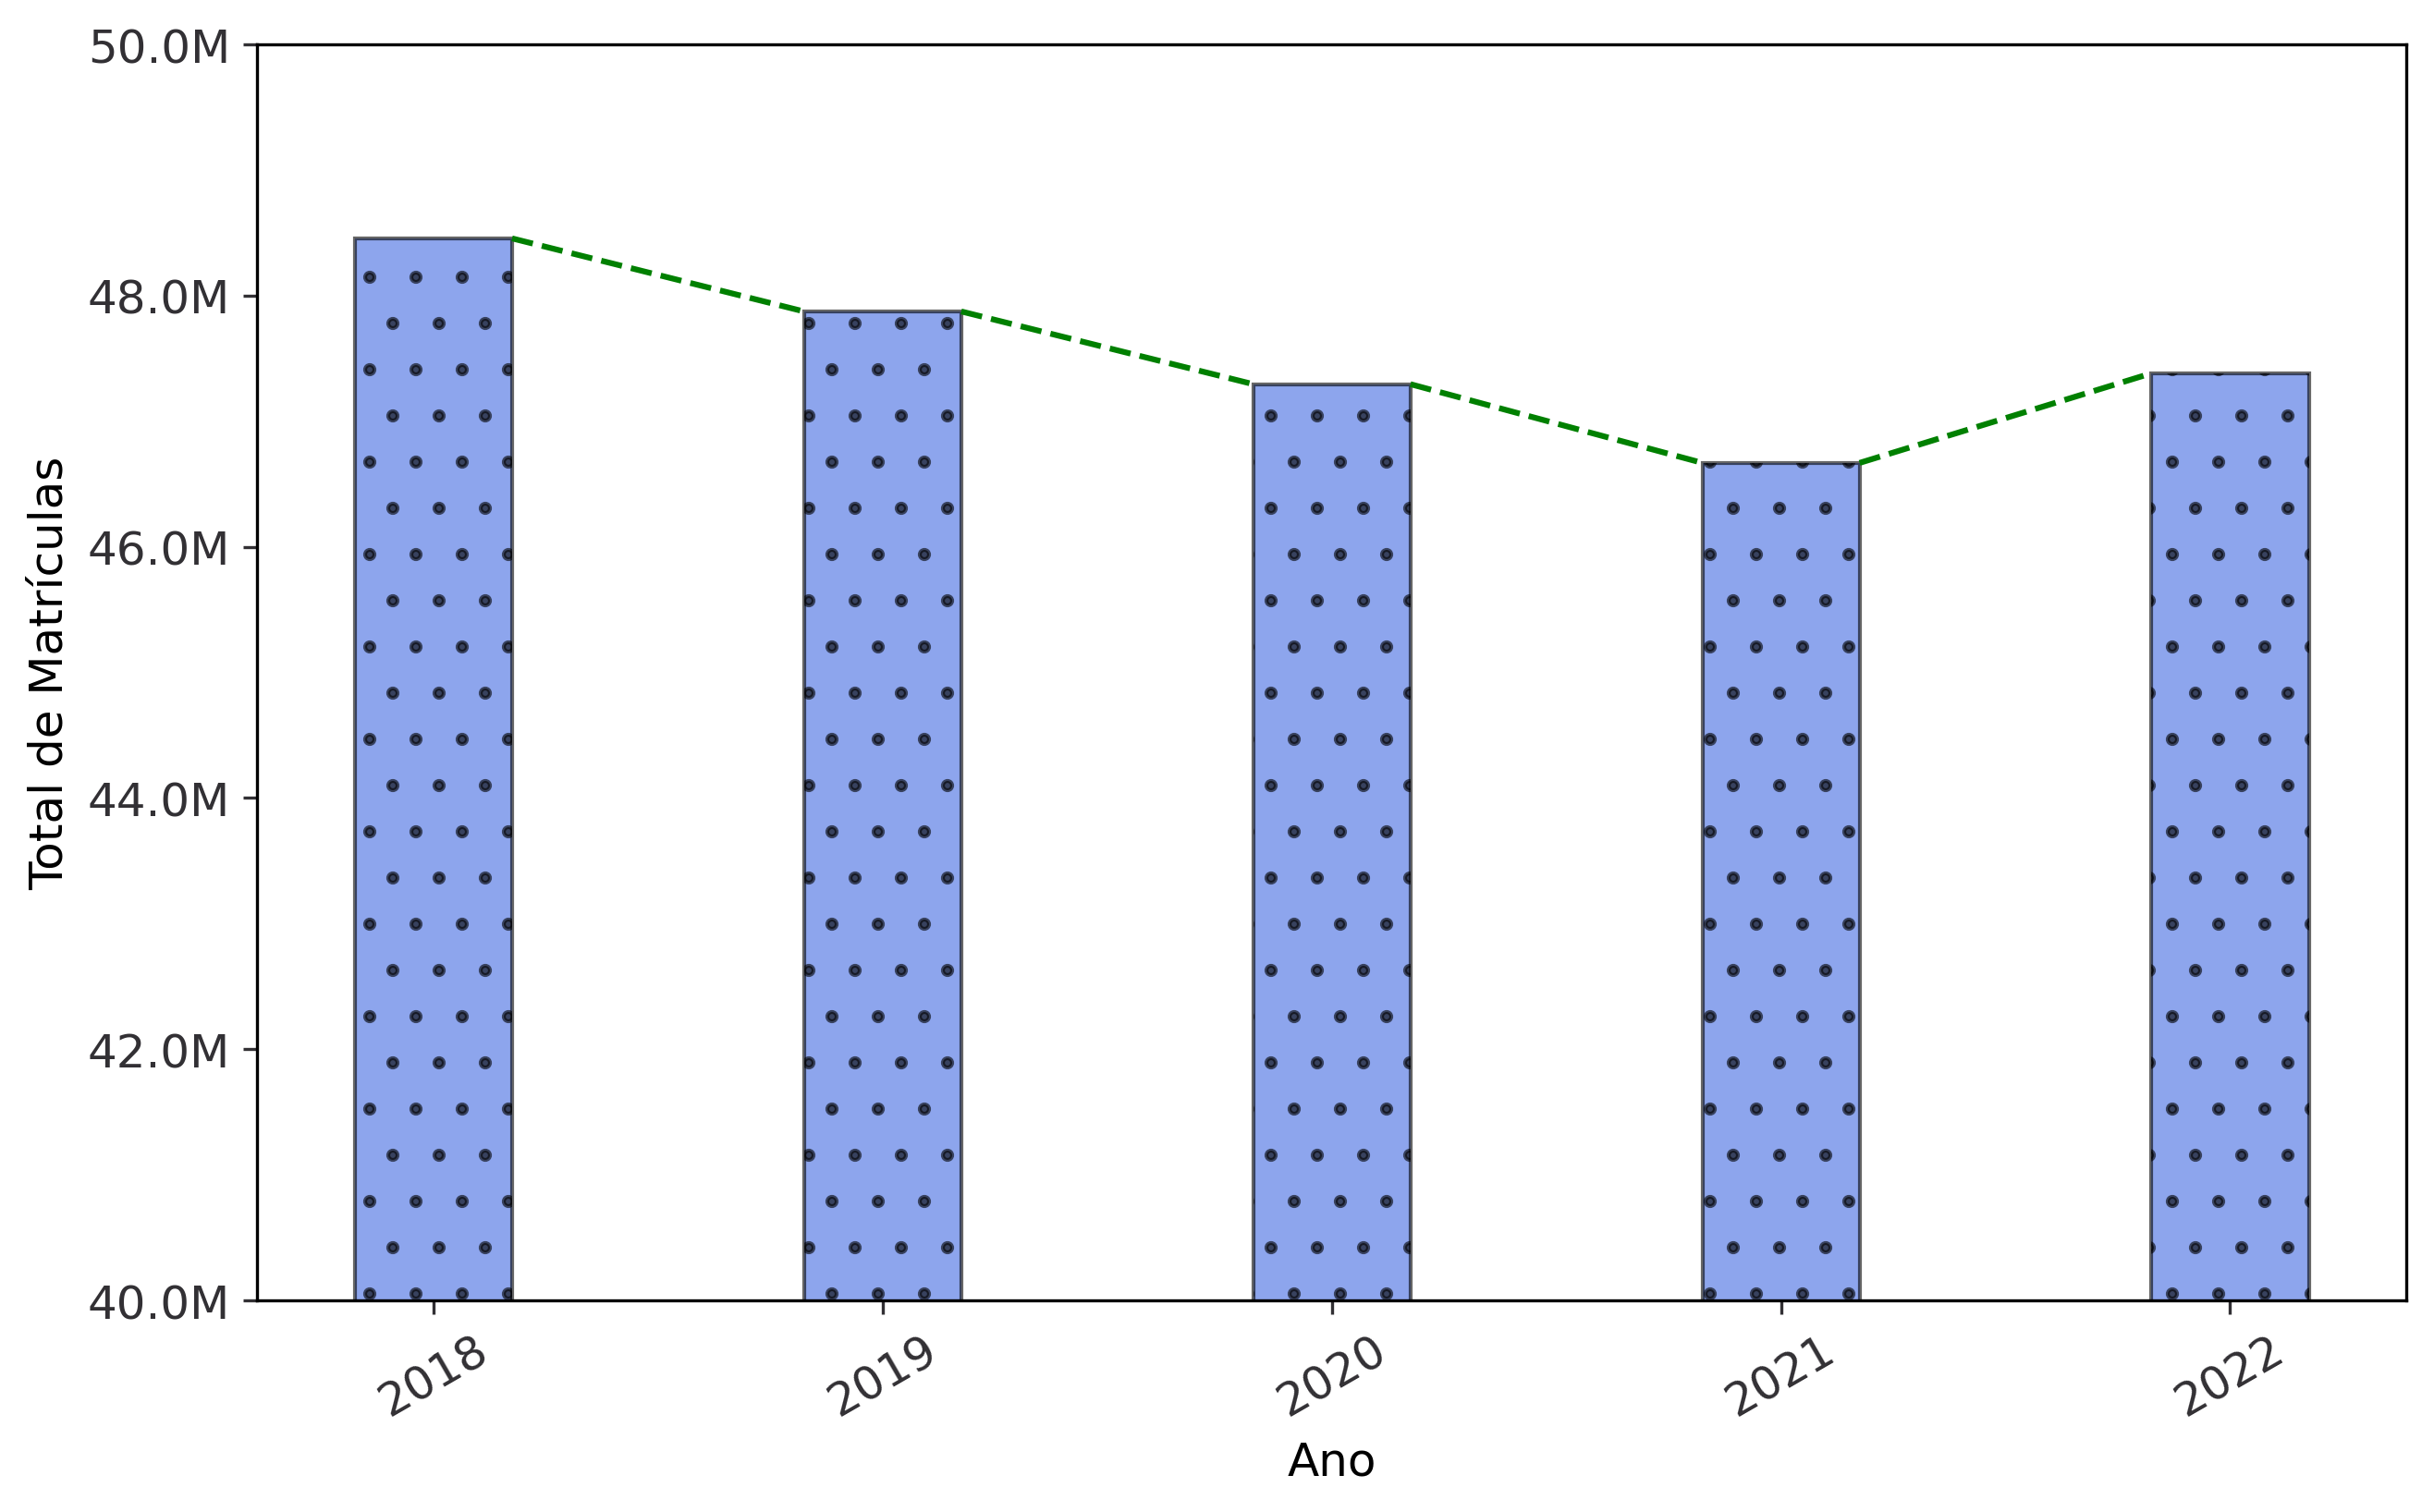

In [ ]:
## TOTAL DE MATRICULADOS 
## Apagado pq era temporário essa célula

In [ ]:
### Dropa que não forem de creche
## 0. Exclui tudo q nao tiver creche
data_2018 = data_2018[data_2018.apply(lambda x: x['QT_MAT_INF_CRE'] > 0, axis=1)]
data_2019 = data_2019[data_2019.apply(lambda x: x['QT_MAT_INF_CRE'] > 0, axis=1)]
data_2020 = data_2020[data_2020.apply(lambda x: x['QT_MAT_INF_CRE'] > 0, axis=1)]
data_2021 = data_2021[data_2021.apply(lambda x: x['QT_MAT_INF_CRE'] > 0, axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['QT_MAT_INF_CRE'] > 0, axis=1)]

In [ ]:
### Dropa que não tiver educacao especial
## 0. Exclui tudo q nao educacao especial
data_2018 = data_2018[data_2018.apply(lambda x: x['QT_MAT_ESP'] > 0, axis=1)]
data_2019 = data_2019[data_2019.apply(lambda x: x['QT_MAT_ESP'] > 0, axis=1)]
data_2020 = data_2020[data_2020.apply(lambda x: x['QT_MAT_ESP'] > 0, axis=1)]
data_2021 = data_2021[data_2021.apply(lambda x: x['QT_MAT_ESP'] > 0, axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['QT_MAT_ESP'] > 0, axis=1)]

In [ ]:
## 1. Exclui quem não tá em funcionamento
## ans = data_2021.groupby('TP_SITUACAO_FUNCIONAMENTO')
## ans.size()
data_2018 = data_2018[data_2018.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2019 = data_2019[data_2019.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2020 = data_2020[data_2020.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2021 = data_2021[data_2021.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]


## 2. Troca 1,2,3 no TP_dependencia pra publico e 4 pra privado
def changeDependency(dep):
  deps = [1,2,3]    ## tipos de dep pública
  if dep in deps:
    return 'Pública'
  else:
    return 'Privada'

if 'TP_DEPENDENCIA_STR' not in data_2018.columns:
    print("Mudando a tp dependencia da escola 2021...")
    data_2018['TP_DEPENDENCIA_STR'] = data_2018['TP_DEPENDENCIA'].apply(changeDependency)
    data_2019['TP_DEPENDENCIA_STR'] = data_2019['TP_DEPENDENCIA'].apply(changeDependency)
    data_2020['TP_DEPENDENCIA_STR'] = data_2020['TP_DEPENDENCIA'].apply(changeDependency)
    data_2021['TP_DEPENDENCIA_STR'] = data_2021['TP_DEPENDENCIA'].apply(changeDependency)
    data_2022['TP_DEPENDENCIA_STR'] = data_2022['TP_DEPENDENCIA'].apply(changeDependency)


## 3. Exclui as privadas
## ans = data_2021.groupby('TP_DEPENDENCIA_STR')
## ans.size()
data_2018 = data_2018[data_2018.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
data_2019 = data_2019[data_2019.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
data_2020 = data_2020[data_2020.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
data_2021 = data_2021[data_2021.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]


## 4. Junta o total de matrículas em uma nova variável
def somaMatrs(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

if 'TOTAL_MATRS' not in data_2018.columns:
  print("Adding total de matriculas ..")
  data_2018['TOTAL_MATRS'] = data_2018.apply(somaMatrs, axis=1)
  data_2019['TOTAL_MATRS'] = data_2019.apply(somaMatrs, axis=1)
  data_2020['TOTAL_MATRS'] = data_2020.apply(somaMatrs, axis=1)
  data_2021['TOTAL_MATRS'] = data_2021.apply(somaMatrs, axis=1)
  data_2022['TOTAL_MATRS'] = data_2022.apply(somaMatrs, axis=1)


## 5. Exclui quem nao tem predio
#data_2018 = data_2018[data_2018.apply(lambda x: x['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1, axis=1)]
#data_2019 = data_2019[data_2019.apply(lambda x: x['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1, axis=1)]
#data_2020 = data_2020[data_2020.apply(lambda x: x['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1, axis=1)]
#data_2021 = data_2021[data_2021.apply(lambda x: x['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1, axis=1)]
#data_2022 = data_2022[data_2022.apply(lambda x: x['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1, axis=1)]

print(len(data_2018.index))

Mudando a tp dependencia da escola 2021...
Adding total de matriculas ..
142373


In [ ]:
'''
  Retorna o total de matriculados por ano
'''

data_2018['ANO'] = 2018
data_2019['ANO'] = 2019
data_2020['ANO'] = 2020
data_2021['ANO'] = 2021
data_2022['ANO'] = 2022


# concatenate the two dataframes
aux = pd.concat([data_2018, data_2019], ignore_index=True)
del data_2018
del data_2019
gc.collect()

aux = pd.concat([aux, data_2020], ignore_index=True)
del data_2020
gc.collect()

aux = pd.concat([aux, data_2021], ignore_index=True)
aux = pd.concat([aux, data_2022], ignore_index=True)

print(len(aux.index))
print(aux.head(2))
print(aux.tail(2))


138355
138355


In [ ]:
'''
  Continuacao
  Retorna numero de matriculados por ano
'''
def somaMatrsAux(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

aux['QT_MAT_BAS_FEM'] = aux['QT_MAT_BAS_FEM'].fillna(0)
aux['QT_MAT_BAS_MASC'] = aux['QT_MAT_BAS_MASC'].fillna(0)
agrupado_matrs = aux.groupby(['ANO']).agg({'QT_MAT_BAS_FEM': 'sum', 'QT_MAT_BAS_MASC': 'sum'})
if 'TOTAL_MATRS' not in agrupado_matrs.columns:
  print("Adding total de matriculas...")
  agrupado_matrs['TOTAL_MATRS'] = agrupado_matrs.apply(somaMatrsAux, axis=1)

agrupado_matrs.reset_index(inplace=True)
print(agrupado_matrs)


Adding total de matriculas...
    ANO  QT_MAT_BAS_FEM  QT_MAT_BAS_MASC  TOTAL_MATRS
0  2022      18842260.0       19539768.0   38382028.0


[2018, 2019, 2020, 2021, 2022]
[13879732.0, 13875736.0, 13737065.0, 13786624.0, 13861465.0]
13875736.0
13737065.0
13786624.0
13861465.0


<Figure size 1800x1200 with 0 Axes>

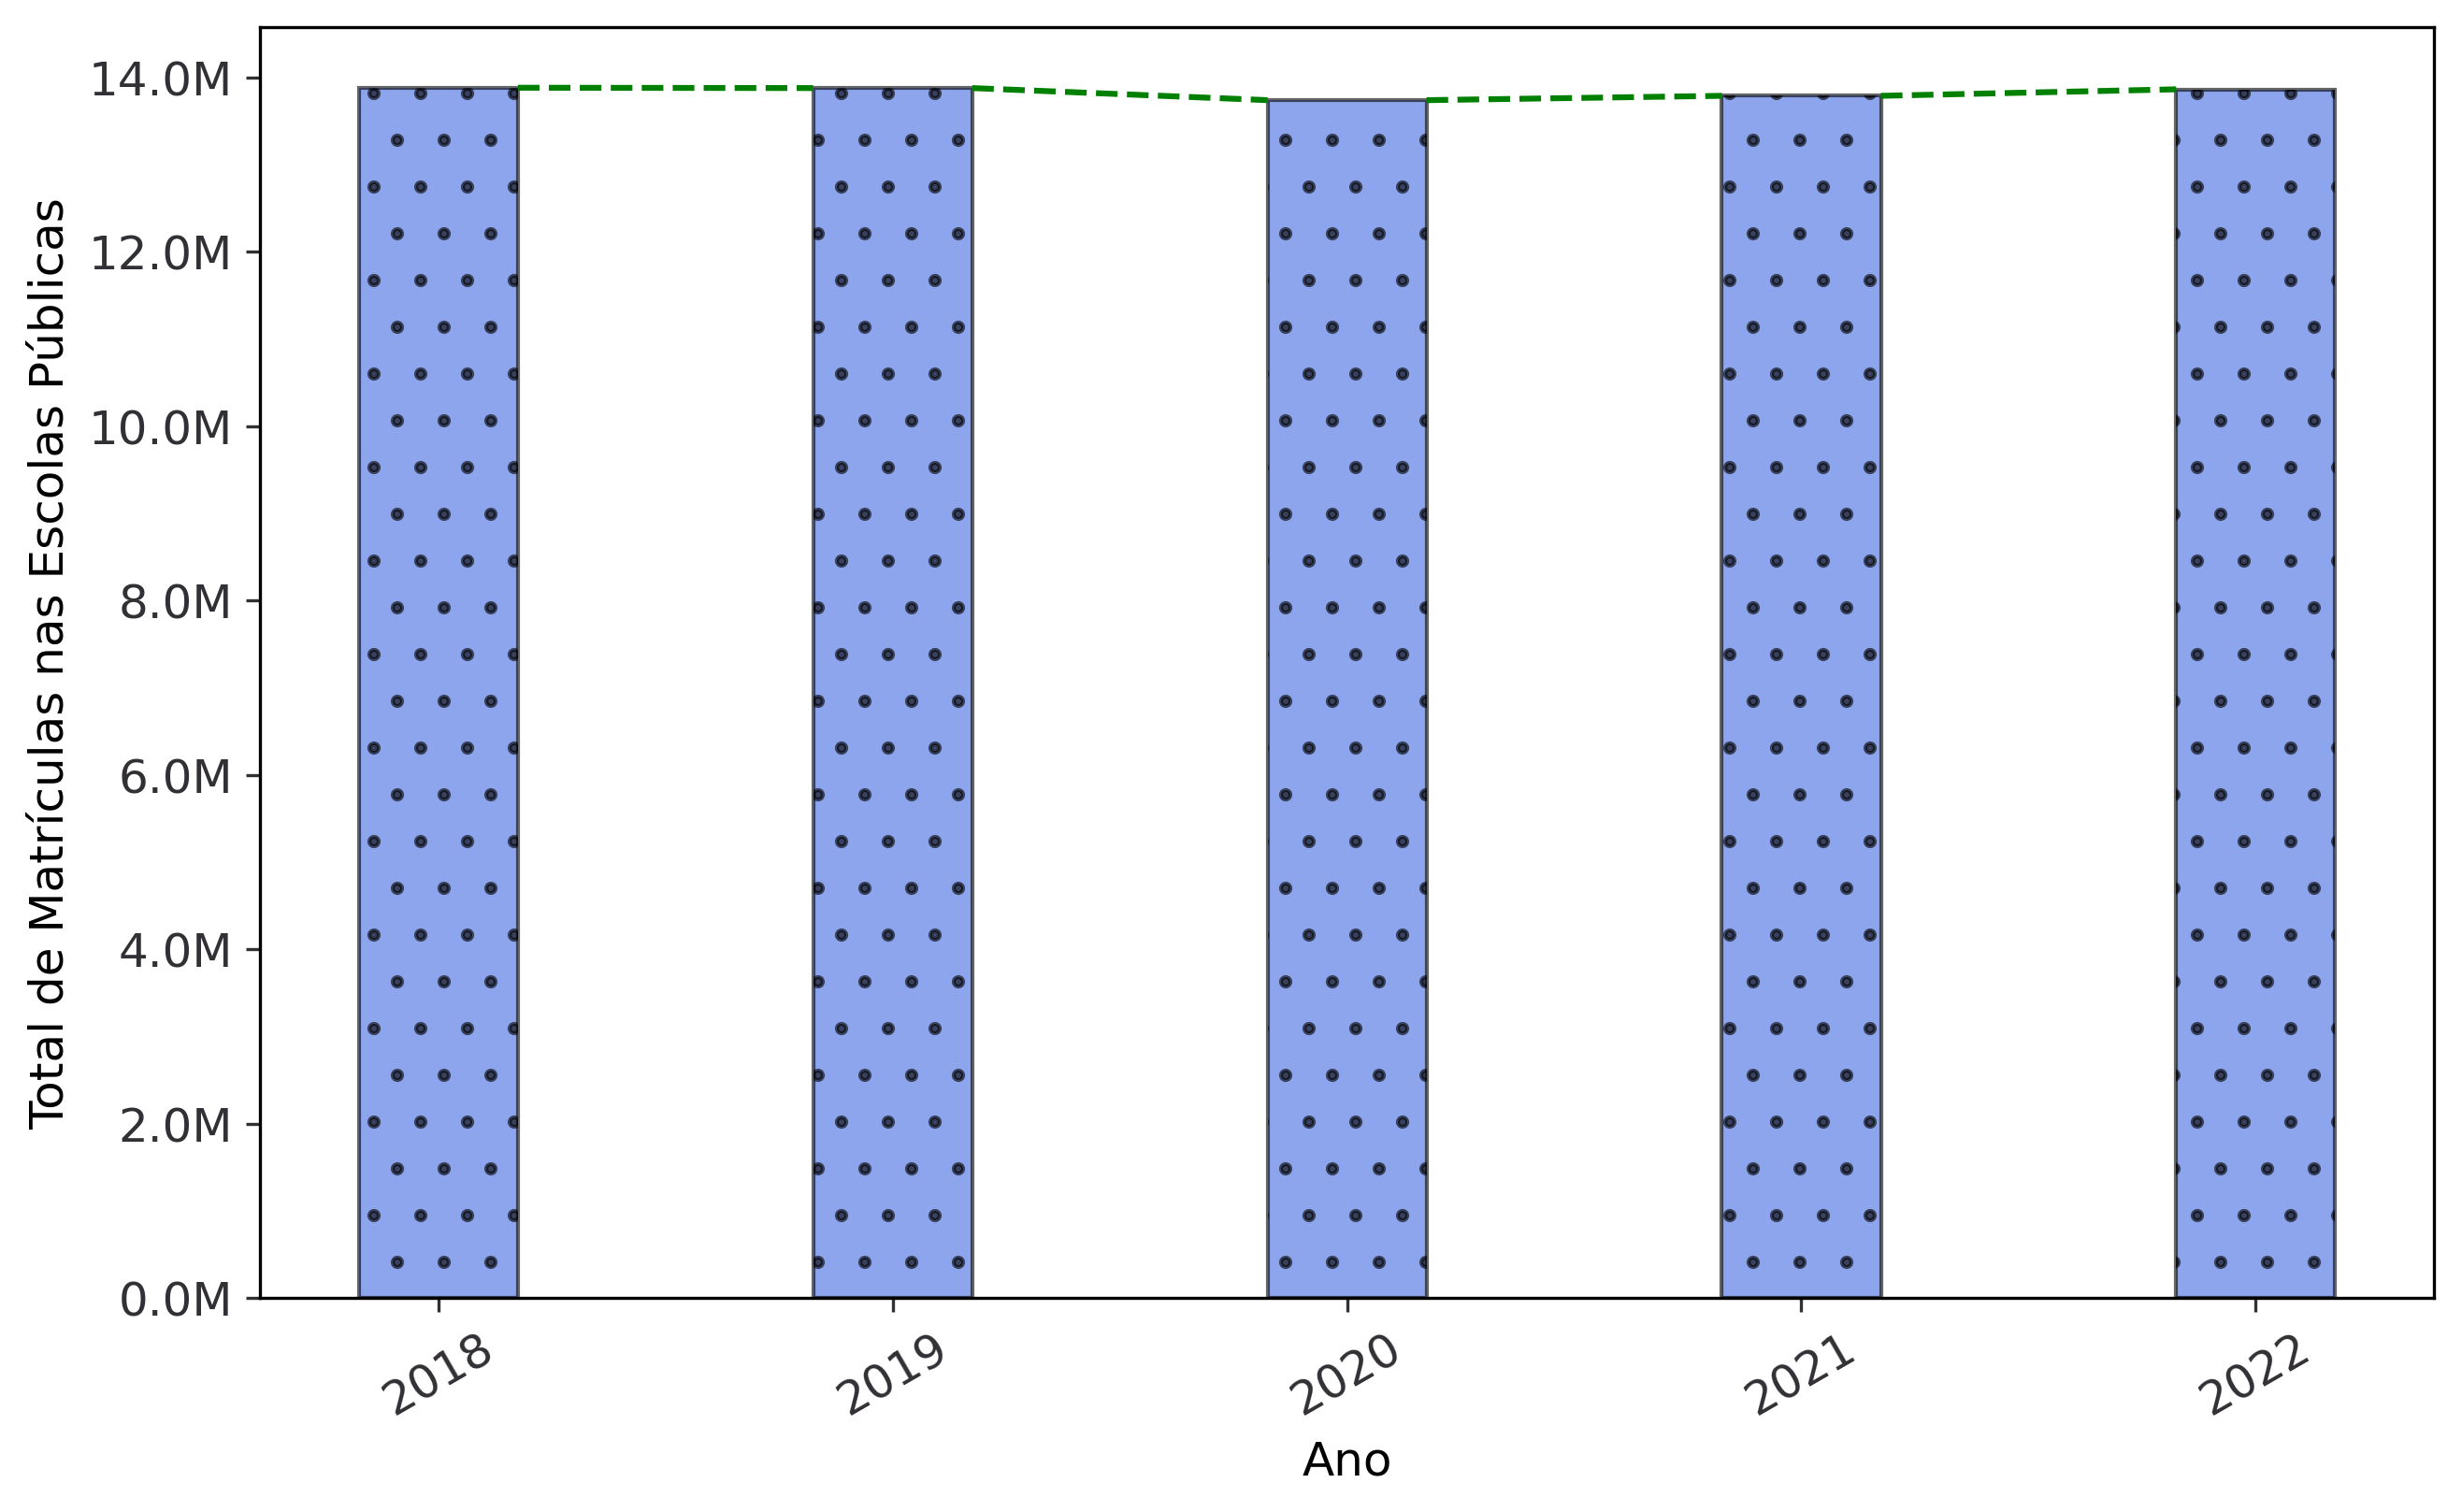

In [ ]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig = plt.figure()
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(formatter)

print(agrupado_matrs['ANO'].tolist())
print(agrupado_matrs['TOTAL_MATRS'].tolist())

ax.bar(agrupado_matrs['ANO'].tolist(), agrupado_matrs['TOTAL_MATRS'].tolist(),
       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
# set x and y axis labels 
plt.xlabel('Ano')
plt.ylabel('Total de Matrículas nas Escolas Públicas')
#plt.ylim(30000000,40000000)

order = agrupado_matrs['ANO'].tolist()
width = ax.patches[0].get_width()
stacks = len(ax.patches) // len(order)

for i in range(stacks):
  for j in range(0, len(order) - 1):
    h0 = np.sum([ax.patches[j + len(order) * k].get_height() for k in range(0, i + 1)])
    h1 = np.sum([ax.patches[j + 1 + len(order) * k].get_height() for k in range(0, i + 1)])

    print(h1)

    ax.plot([order[j] + width / 2, order[j] + 1 - width / 2], [h0, h1], color='green', ls='--', zorder=1)

plt.xticks(rotation=30, horizontalalignment="center")
#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("1b. Total de Matrículas nas publicas.png", dpi=300)

In [ ]:
## se preicsar da porcentagem, use normalize=True no value_counts
ans = aux.groupby(['ANO', 'TP_LOCALIZACAO'])['TP_OCUPACAO_PREDIO_ESCOLAR'].value_counts(normalize=True).rename('Percentage').reset_index()
ans = ans[ans['ANO'] == 2022]

print(ans)
print("número de escolas em 2022: ", len(data_2022.index))

ans = aux.groupby(['ANO', 'TP_LOCALIZACAO'])['IN_BIBLIOTECA'].value_counts(normalize=True).rename('Percentage').reset_index()
# ans = ans[ans['ANO'] == 2022]

print(ans)

    ANO  TP_LOCALIZACAO  TP_OCUPACAO_PREDIO_ESCOLAR  Percentage
0  2022               1                         1.0    0.881755
1  2022               1                         3.0    0.072556
2  2022               1                         2.0    0.045690
3  2022               2                         1.0    0.932398
4  2022               2                         3.0    0.052116
5  2022               2                         2.0    0.015486
número de escolas em 2022:  138355
    ANO  TP_LOCALIZACAO  IN_BIBLIOTECA  Percentage
0  2022               1            0.0    0.593699
1  2022               1            1.0    0.406301
2  2022               2            0.0    0.845007
3  2022               2            1.0    0.154993


Cerca de 10% das escolas públicas ainda funcionam em prédios não próprios (alugados ou cedidos), o que representa mais de 13 mil escolas no país que ainda não possuem prédio próprio. Esse valor é especialmente mais alto quando analisado as escolas localizadas fora da área urbana, no qual 10 mil delas não ocupam prédios próprios em 2022

Mudando para string o hasBiblioteca()
Mudando para string o TP_LOCALIZACAO
     ANO  TP_LOCALIZACAO  IN_BIBLIOTECA  Percentage IN_BIBLIOTECA_STR  \
16  2022               1            0.0    0.752284    Sem Biblioteca   
17  2022               1            1.0    0.247716    Com Biblioteca   
18  2022               2            0.0    0.880351    Sem Biblioteca   
19  2022               2            1.0    0.119649    Com Biblioteca   

   TP_LOCALIZACAO_STR  
16             Urbana  
17             Urbana  
18              Rural  
19              Rural  
IN_BIBLIOTECA_STR   Com Biblioteca  Sem Biblioteca
TP_LOCALIZACAO_STR                                
Rural                     0.119649        0.880351
Urbana                    0.247716        0.752284
[2022, 2022, 2022, 2022]
[0.7522839671595976, 0.24771603284040247, 0.8803511790304624, 0.1196488209695375]


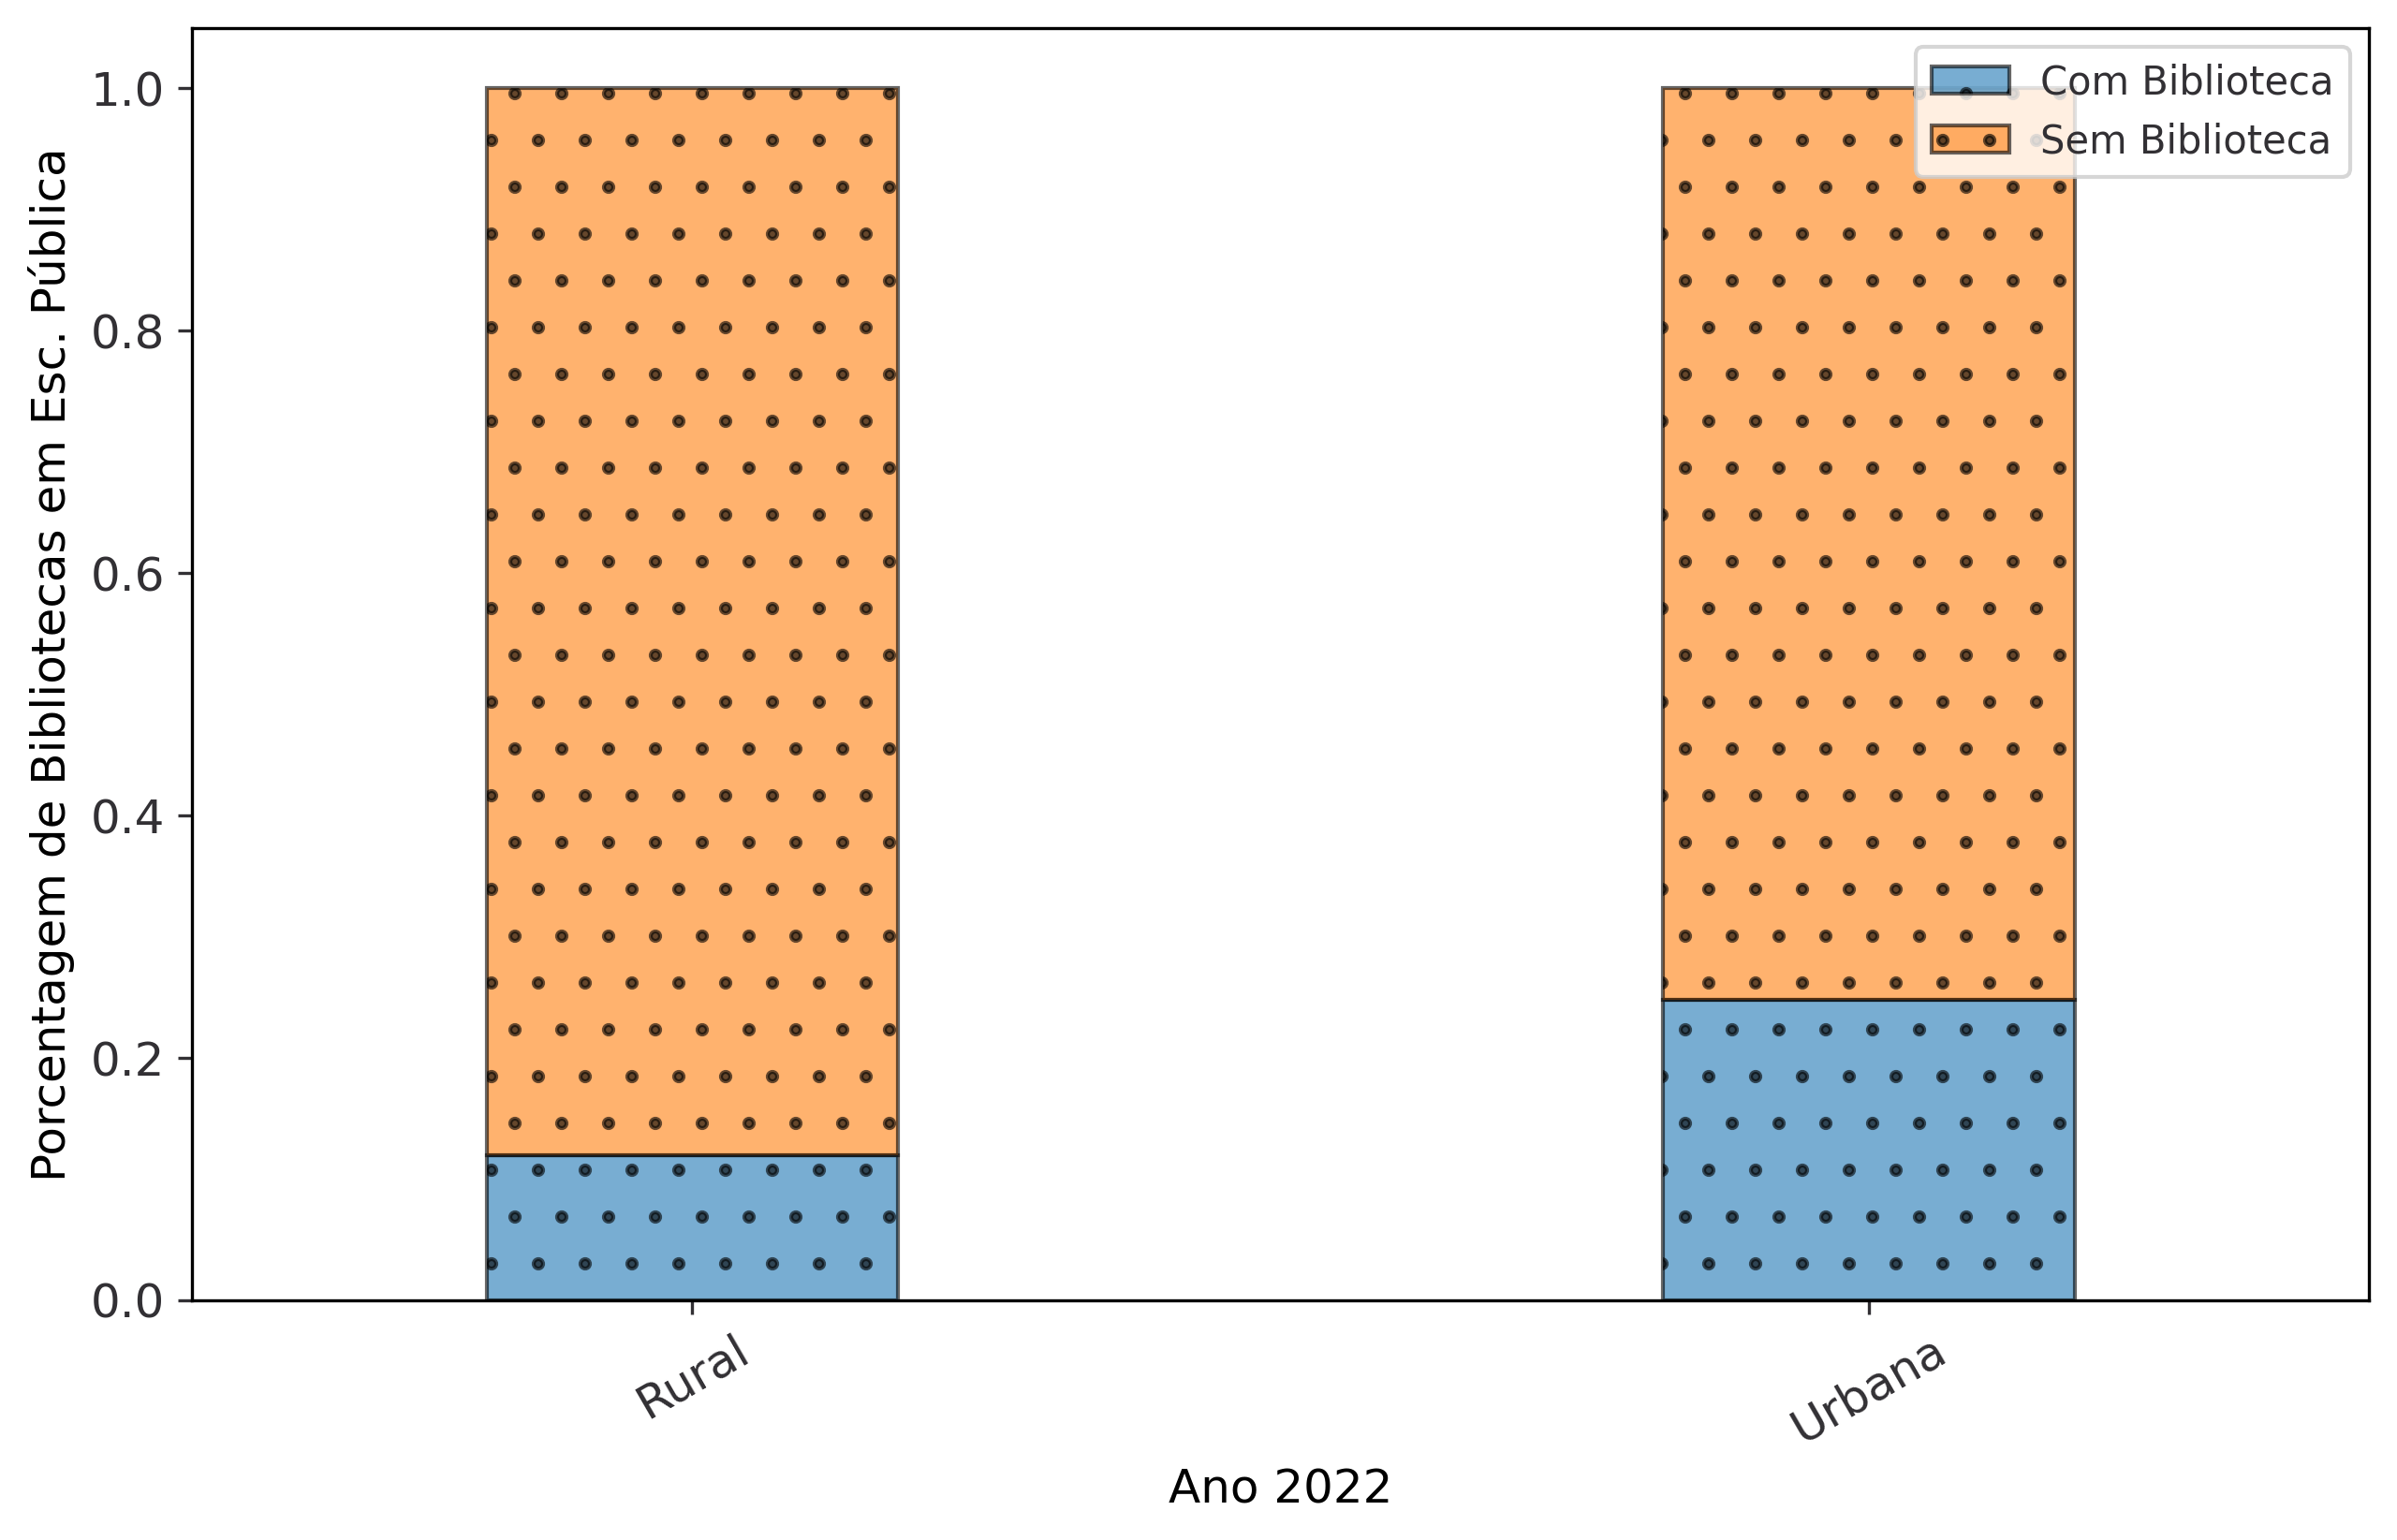

In [ ]:
from matplotlib.ticker import FuncFormatter

def changeTPEscolaType(tp):
  if tp == 1:
    return 'Urbana'
  else:
    return 'Rural'


def changeHasBiblio(bib):
  if bib == 0:
    return 'Sem Biblioteca'
  else:
    return 'Com Biblioteca'


def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)


if 'IN_BIBLIOTECA_STR' not in ans.columns:
    print("Mudando para string o hasBiblioteca()")
    ans['IN_BIBLIOTECA_STR'] = ans['IN_BIBLIOTECA'].apply(changeHasBiblio)

if 'TP_LOCALIZACAO_STR' not in ans.columns:
    print("Mudando para string o TP_LOCALIZACAO")
    ans['TP_LOCALIZACAO_STR'] = ans['TP_LOCALIZACAO'].apply(changeTPEscolaType)
ans = ans.loc[ans['ANO'] == 2022]
print(ans)
## agrupa pelo tipo de localizacao e pela biblioteca pra plotar em barra empilhado
ans2 = ans.groupby(['TP_LOCALIZACAO_STR', 'IN_BIBLIOTECA_STR'])['Percentage'].sum().unstack()
print(ans2)

formatter = FuncFormatter(millions)

#fig = plt.figure()
#plt.figure(figsize=(10, 6))
#ax = plt.subplot(111)
#ax.yaxis.set_major_formatter(formatter)

print(ans['ANO'].tolist())
print(ans['Percentage'].tolist())

#ax.bar("ans['ANO'].tolist()", ans['Percentage'].tolist(),
#       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
ax = ans2.plot(kind='bar', stacked=True, ec = "k", alpha = .6, width=0.35, hatch=".",
               figsize=(10,6))
# set x and y axis labels 
plt.xlabel('Ano 2022')
plt.ylabel('Porcentagem de Bibliotecas em Esc. Pública')
#plt.ylim(0.65,0.70)

ax.legend(title='', loc='upper right')

plt.xticks(rotation=30, horizontalalignment="center")
#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("2b. Porcentagem Bibliotecas por Escolas na Rural-Urbana.png", dpi=300)

    ANO  IN_BIBLIOTECA  Percentage
0  2018            0.0    0.683242
1  2018            1.0    0.316758
2  2019            0.0    0.683500
3  2019            1.0    0.316500
4  2020            0.0    0.685462
5  2020            1.0    0.314538
6  2021            0.0    0.681053
7  2021            1.0    0.318947
8  2022            0.0    0.682785
9  2022            1.0    0.317215
Mudando para string o hasBiblioteca()
[2018, 2019, 2020, 2021, 2022]
[0.6832422879177378, 0.6834995340509682, 0.6854618615702631, 0.6810532070509316, 0.6827852711686235]
0.6834995340509682
0.6854618615702631
0.6810532070509316
0.6827852711686235
slope e interc -0.00033603604982651526 1.362001253001265
[2018, 2019, 2020, 2021, 2022]
x:  2020.989
y:  0.7540080477272895


<Figure size 1800x1200 with 0 Axes>

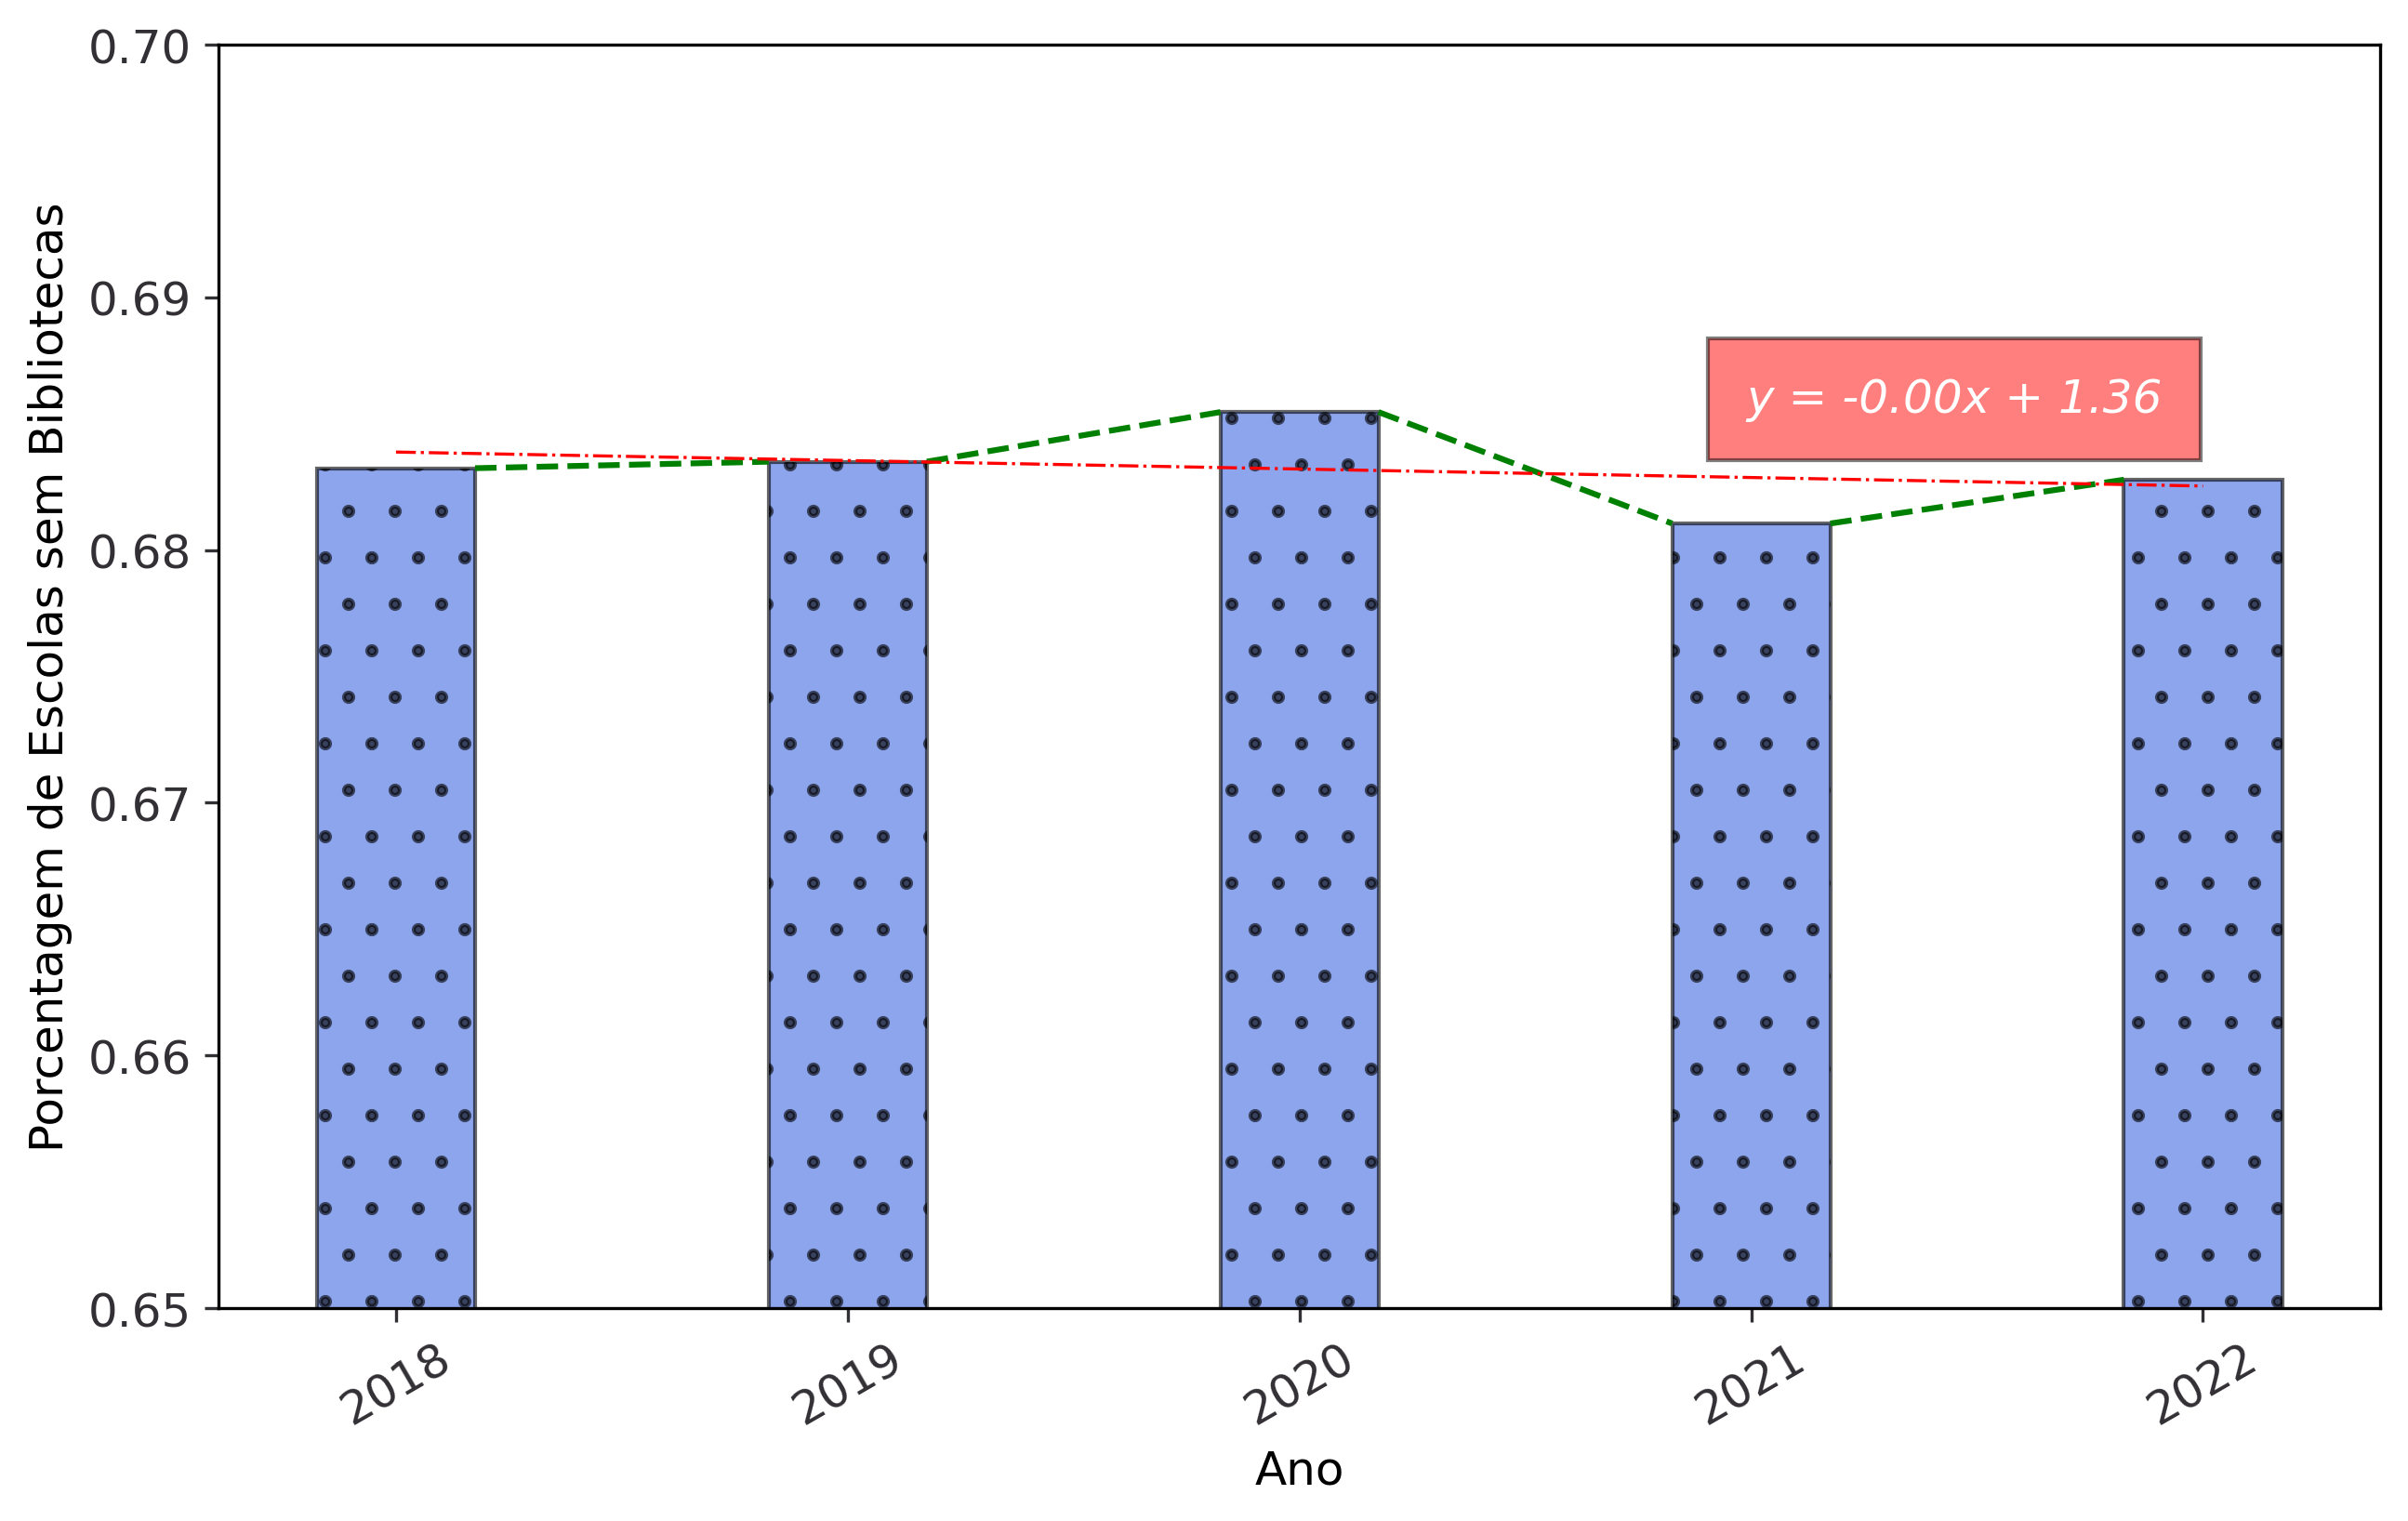

In [ ]:
ans = aux.groupby(['ANO'])['IN_BIBLIOTECA'].value_counts(normalize=True).rename('Percentage').reset_index()
print(ans)

from matplotlib.ticker import FuncFormatter

def changeHasBiblio(bib):
  if bib == 0:
    return 'Sem Biblioteca'
  else:
    return 'Com Biblioteca'


def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)


if 'IN_BIBLIOTECA_STR' not in ans.columns:
    print("Mudando para string o hasBiblioteca()")
    ans['IN_BIBLIOTECA_STR'] = ans['IN_BIBLIOTECA'].apply(changeHasBiblio)
ans = ans.loc[ans['IN_BIBLIOTECA_STR'] == "Sem Biblioteca"]

formatter = FuncFormatter(millions)

fig = plt.figure()
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
#ax.yaxis.set_major_formatter(formatter)

print(ans['ANO'].tolist())
print(ans['Percentage'].tolist())

ax.bar(ans['ANO'].tolist(), ans['Percentage'].tolist(),
       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
# set x and y axis labels 
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Escolas sem Bibliotecas')
plt.ylim(0.65,0.7)

order = ans['ANO'].tolist()
width = ax.patches[0].get_width()
stacks = len(ax.patches) // len(order)

for i in range(stacks):
  for j in range(0, len(order) - 1):
    h0 = np.sum([ax.patches[j + len(order) * k].get_height() for k in range(0, i + 1)])
    h1 = np.sum([ax.patches[j + 1 + len(order) * k].get_height() for k in range(0, i + 1)])

    print(h1)

    ax.plot([order[j] + width / 2, order[j] + 1 - width / 2], [h0, h1], color='green', ls='--', zorder=1)

# Calculate the slope and intercept of the linear regression line
slope, intercept = np.polyfit(ans['ANO'].tolist(), ans['Percentage'].tolist(), 1)
# Define a function for the linear regression line
print("slope e interc", slope, intercept)
print(ans['ANO'].tolist())
def lin_reg(x):
  x = np.array(x)
  return slope * x + intercept
# Plot the scatter plot of the x and y values
#plt.scatter(ans['ANO'].tolist(), ans['Percentage'].tolist())
# Plot the linear regression line
plt.plot(ans['ANO'].tolist(), lin_reg(ans['ANO'].tolist()), color='red',
         linestyle='dashdot', linewidth=0.8)
print("x: ", 0.9995*np.max(ans['ANO'].tolist()))
print("y: ", 1.1*np.max(ans['Percentage'].tolist()))
plt.text(0.9995*np.max(ans['ANO'].tolist()), np.max(ans['Percentage'].tolist()), 
         f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='white',
         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},
         style='italic')

plt.xticks(rotation=30, horizontalalignment="center")
#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("2a. Porcentagem de Escolas sem Bibliotecas.png", dpi=300)

A falta de estrutura pode ser visto na evolução de escolas com biblioteca ao longo dos últimos 5 anos, no qual o número de bibliotecas chegou a cair em relação ao número de escolas públicas em funcionamento, como pode ser visto na figura acima, no qual o a porcentagem de escolas sem biblioteca ficou maior de 68%.

[2018, 2019, 2020, 2021, 2022]
[39037415.0, 38442187.0, 38251046.0, 38270689.0, 38141597.0]
38442187.0
38251046.0
38270689.0
38141597.0


<Figure size 432x288 with 0 Axes>

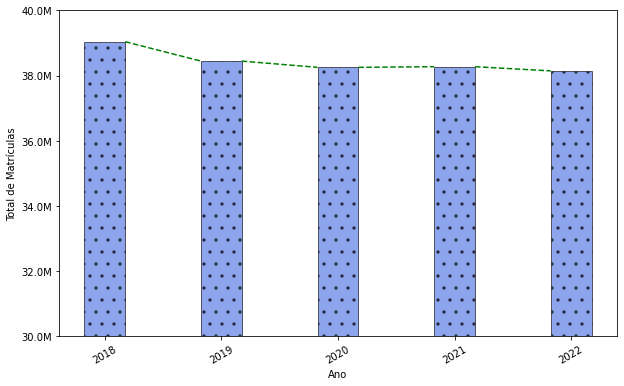

In [ ]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig = plt.figure()
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(formatter)

print(agrupado_matrs['ANO'].tolist())
print(agrupado_matrs['TOTAL_MATRS'].tolist())

ax.bar(agrupado_matrs['ANO'].tolist(), agrupado_matrs['TOTAL_MATRS'].tolist(),
       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
# set x and y axis labels 
plt.xlabel('Ano')
plt.ylabel('Total de Matrículas nas Escolas Públicas')
plt.ylim(30000000,40000000)

order = agrupado_matrs['ANO'].tolist()
width = ax.patches[0].get_width()
stacks = len(ax.patches) // len(order)

for i in range(stacks):
  for j in range(0, len(order) - 1):
    h0 = np.sum([ax.patches[j + len(order) * k].get_height() for k in range(0, i + 1)])
    h1 = np.sum([ax.patches[j + 1 + len(order) * k].get_height() for k in range(0, i + 1)])

    print(h1)

    ax.plot([order[j] + width / 2, order[j] + 1 - width / 2], [h0, h1], color='green', ls='--', zorder=1)

plt.xticks(rotation=30, horizontalalignment="center")
#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("Total de Matrículas nas publicas.png", dpi=300)

# Parte de acessiblidade

Mudando para string o acessibilidadeExist()
    ANO  IN_ACESSIBILIDADE_INEXISTENTE  Percentage  \
0  2022                            0.0    0.635792   
1  2022                            1.0    0.364208   

  IN_ACESSIBILIDADE_INEXISTENTE_STR  
0      Possui alguma Acessibilidade  
1        Acessibilidade Inexistente  
slope e interc 9.00612086545662e-05 0.18210376389953292
[2022]
[0.36420753]
x:  2020.989
y:  0.40062828057897254


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 1800x1200 with 0 Axes>

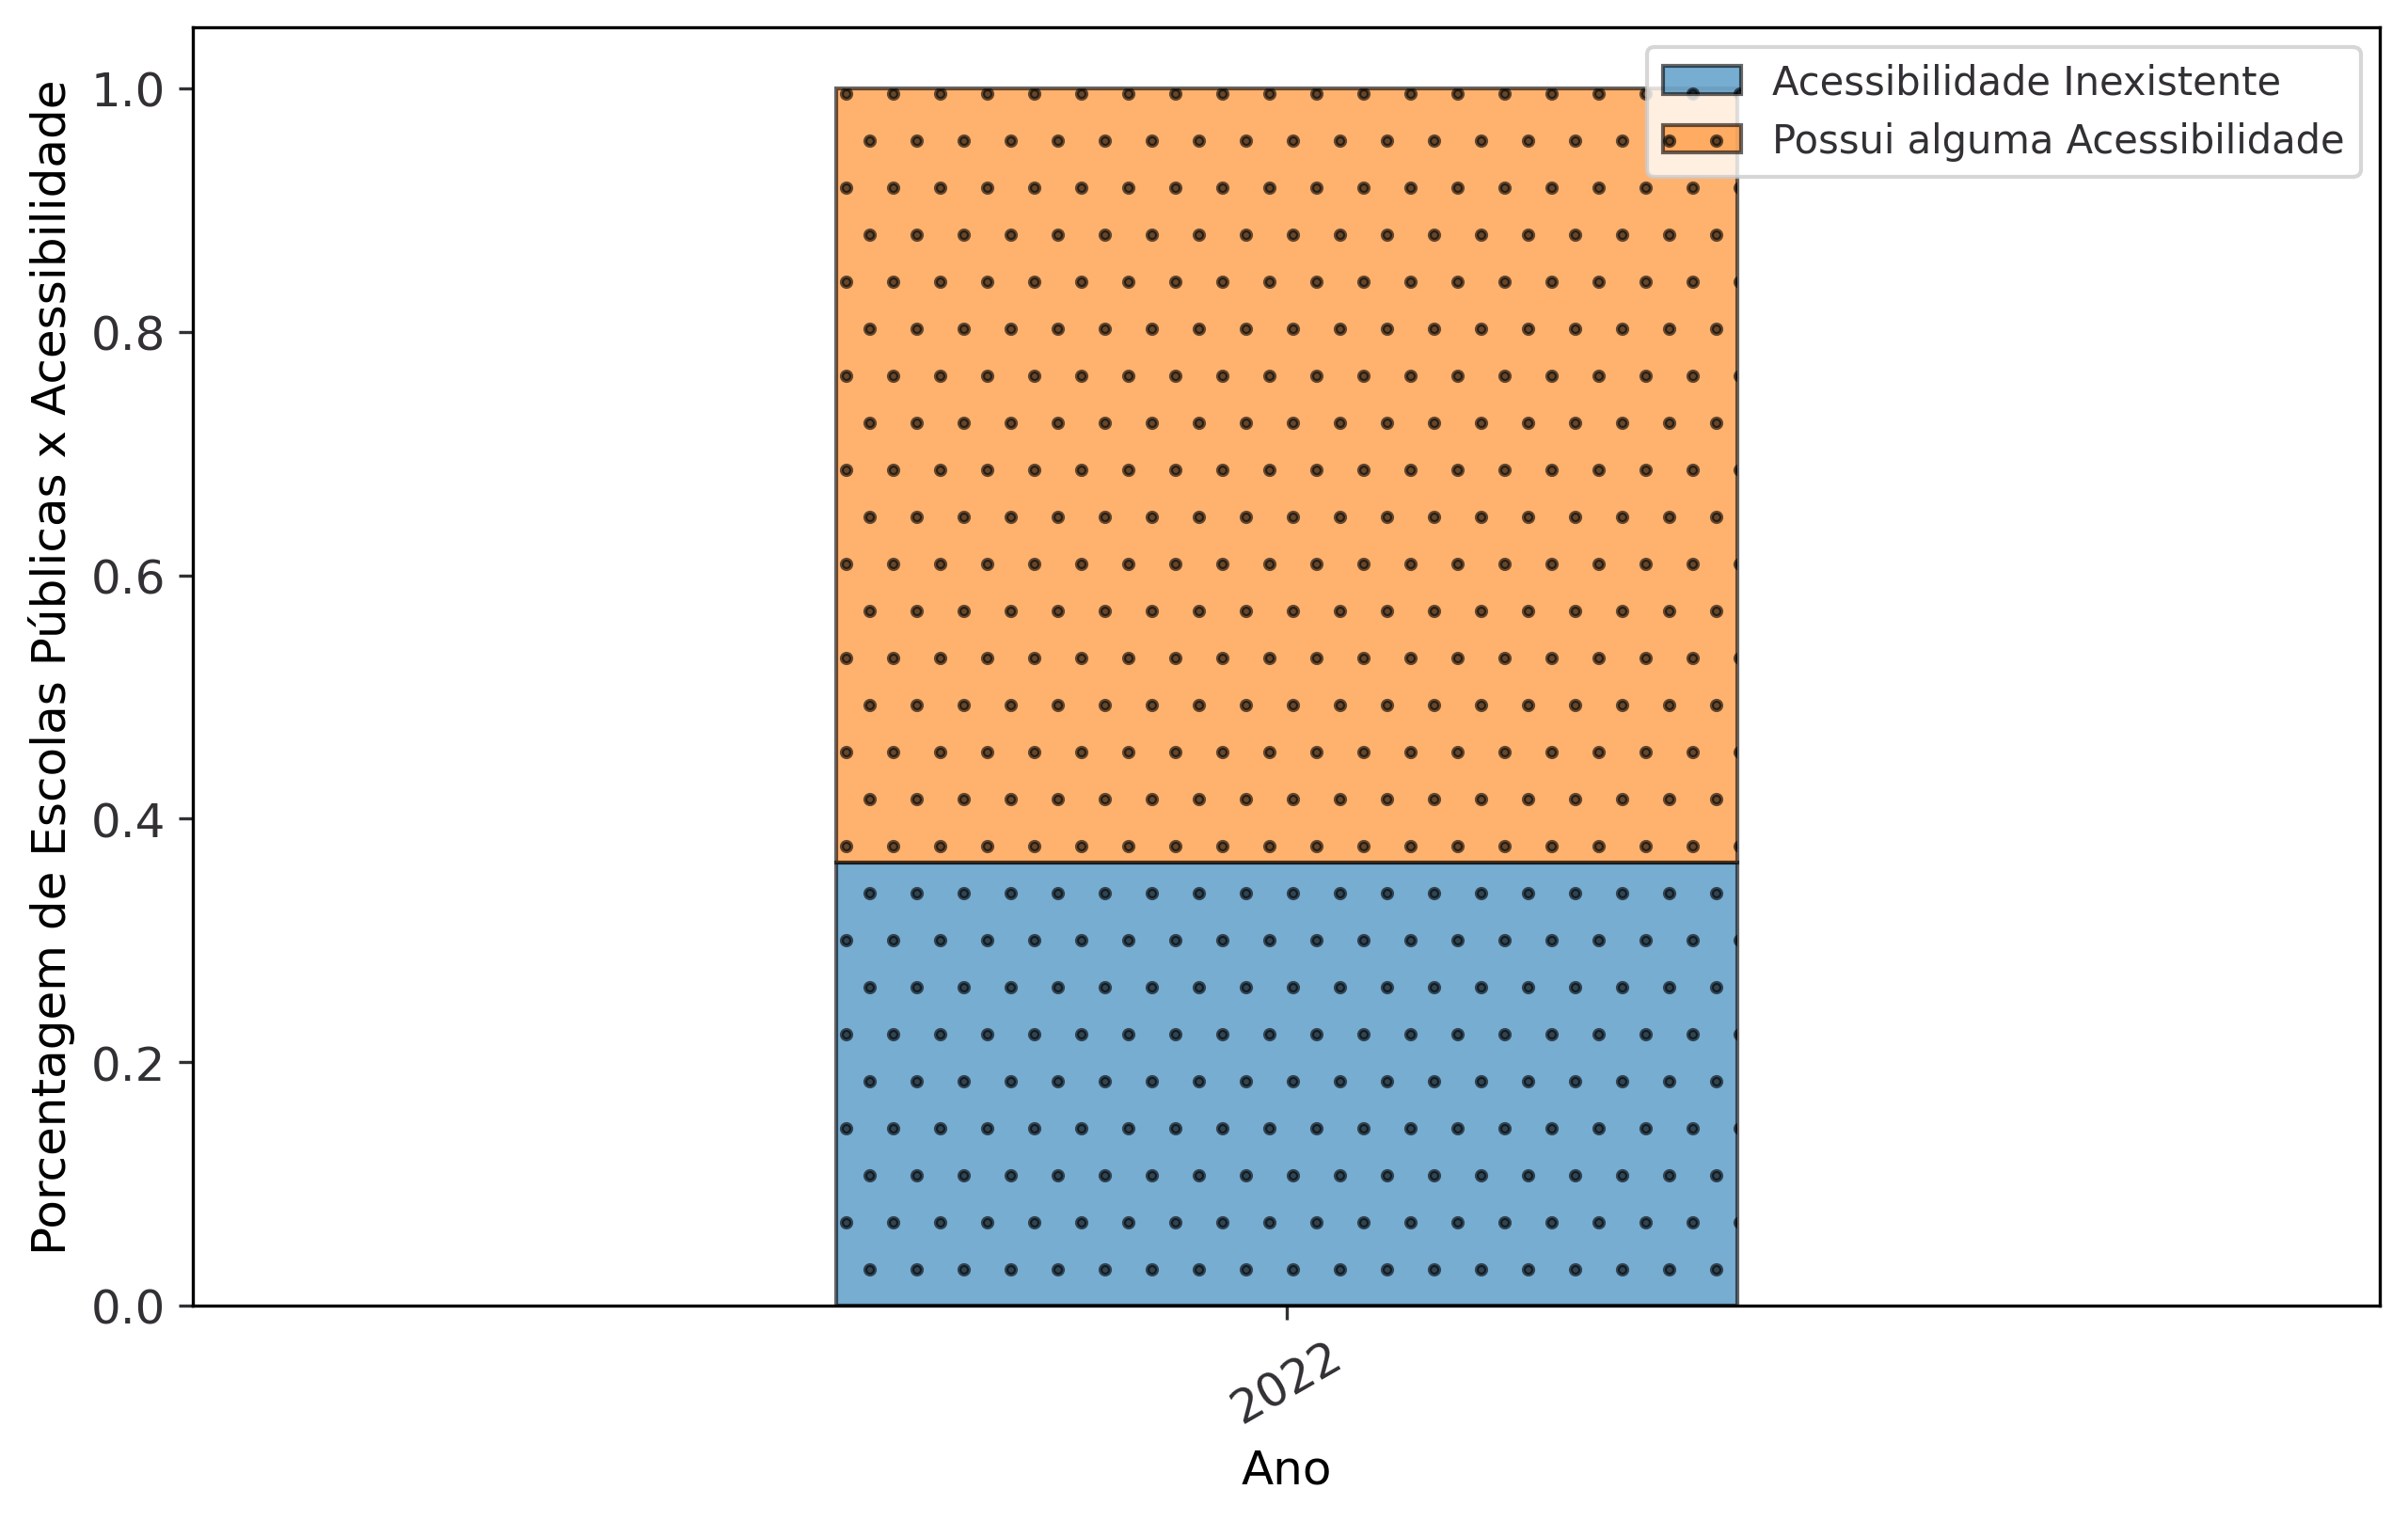

In [ ]:
def changeAcessibilidadeExist(ac):
  if ac == 0:
    return 'Possui alguma Acessibilidade'
  else:
    return 'Acessibilidade Inexistente'

ans = aux.groupby(['ANO'])['IN_ACESSIBILIDADE_INEXISTENTE'].value_counts(normalize=True).rename('Percentage').reset_index()
# ans = ans[ans['ANO'] == 2022]

if 'IN_ACESSIBILIDADE_INEXISTENTE_STR' not in ans.columns:
    print("Mudando para string o acessibilidadeExist()")
    ans['IN_ACESSIBILIDADE_INEXISTENTE_STR'] = ans['IN_ACESSIBILIDADE_INEXISTENTE'].apply(changeAcessibilidadeExist)
#ans = ans.loc[ans['IN_BIBLIOTECA_STR'] == "Sem Biblioteca"]

print(ans)

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)

#ans = ans.loc[ans['ANO'] == 2022]
## agrupa pelo tipo de localizacao e pela biblioteca pra plotar em barra empilhado
ans2 = ans.groupby(['ANO', 'IN_ACESSIBILIDADE_INEXISTENTE_STR'])['Percentage'].sum().unstack()

formatter = FuncFormatter(millions)

## Comentar isso aqui se for plot de stack bar
fig = plt.figure()
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
#ax.yaxis.set_major_formatter(formatter)

#ax.bar("ans['ANO'].tolist()", ans['Percentage'].tolist(),
#       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
#ax = ans2.plot(kind='bar', stacked=True, ec = "k", alpha = .6, width=0.35, hatch=".",
#               figsize=(10,6))
ans2.plot(ax=ax,kind='bar', stacked=True, ec = "k", alpha = .6, width=0.35, hatch=".")
# set x and y axis labels 
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Escolas Públicas x Acessibilidade')
#plt.ylim(0.65,0.70)

ax.legend(title='', loc='upper right')

plt.xticks(rotation=30, horizontalalignment="center")

# Calculate the slope and intercept of the linear regression line
ans3 = ans.loc[ans['IN_ACESSIBILIDADE_INEXISTENTE'] == 1]
slope, intercept = np.polyfit(ans3['ANO'].tolist(), ans3['Percentage'].tolist(), 1)
# Define a function for the linear regression line
print("slope e interc", slope, intercept)
print(ans3['ANO'].tolist())
def lin_reg(x):
  x = np.array(x)
  print(slope * x + intercept)
  return slope * x + intercept
# Plot the scatter plot of the x and y values
#ax = plt.scatter(ans3['ANO'].tolist(), ans3['Percentage'].tolist())
#ax = ans3.plot.scatter(ans3['ANO'].tolist(), ans3['Percentage'].tolist())
# Plot the linear regression line
ax = plt.plot(ans3['ANO'].tolist(), lin_reg(ans3['ANO'].tolist()), color='red',
         linestyle='dashdot', linewidth=0.8)
print("x: ", 0.9995*np.max(ans3['ANO'].tolist()))
print("y: ", 1.1*np.max(ans3['Percentage'].tolist()))
#plt.text(0.9995*np.max(ans3['ANO'].tolist()), np.max(ans3['Percentage'].tolist()), 
#         f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='white',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},
#         style='italic')

#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("3. Porcentagem de Escolas Publicas com alguma Acessibilidade.png", dpi=300)

In [ ]:
ans = aux.groupby(['ANO'])['IN_ACESSIBILIDADE_SINAL_SONORO'].value_counts(normalize=True).rename('Percentage').reset_index()
# ans = ans[ans['ANO'] == 2022]
print(ans)

ans = aux.groupby(['ANO'])['IN_ACESSIBILIDADE_SINAL_TATIL'].value_counts(normalize=True).rename('Percentage').reset_index()
# ans = ans[ans['ANO'] == 2022]
print(ans)

ans = aux.groupby(['ANO'])['IN_ACESSIBILIDADE_PISOS_TATEIS'].value_counts(normalize=True).rename('Percentage').reset_index()
# ans = ans[ans['ANO'] == 2022]
print(ans)

    ANO  IN_ACESSIBILIDADE_SINAL_SONORO  Percentage
0  2019                             0.0    0.993587
1  2019                             1.0    0.006413
2  2020                             0.0    0.991344
3  2020                             1.0    0.008656
4  2021                             0.0    0.989290
5  2021                             1.0    0.010710
6  2022                             0.0    0.989202
7  2022                             1.0    0.010798
    ANO  IN_ACESSIBILIDADE_SINAL_TATIL  Percentage
0  2019                            0.0    0.986214
1  2019                            1.0    0.013786
2  2020                            0.0    0.985483
3  2020                            1.0    0.014517
4  2021                            0.0    0.981728
5  2021                            1.0    0.018272
6  2022                            0.0    0.979000
7  2022                            1.0    0.021000
    ANO  IN_ACESSIBILIDADE_PISOS_TATEIS  Percentage
0  2019              

    ANO  QT_MAT_ESP
0  2018    985920.0
1  2019   1050446.0
2  2020   1106873.0
3  2021   1152054.0
4  2022   1297732.0
1050446.0
1106873.0
1152054.0
1297732.0


<Figure size 1800x1200 with 0 Axes>

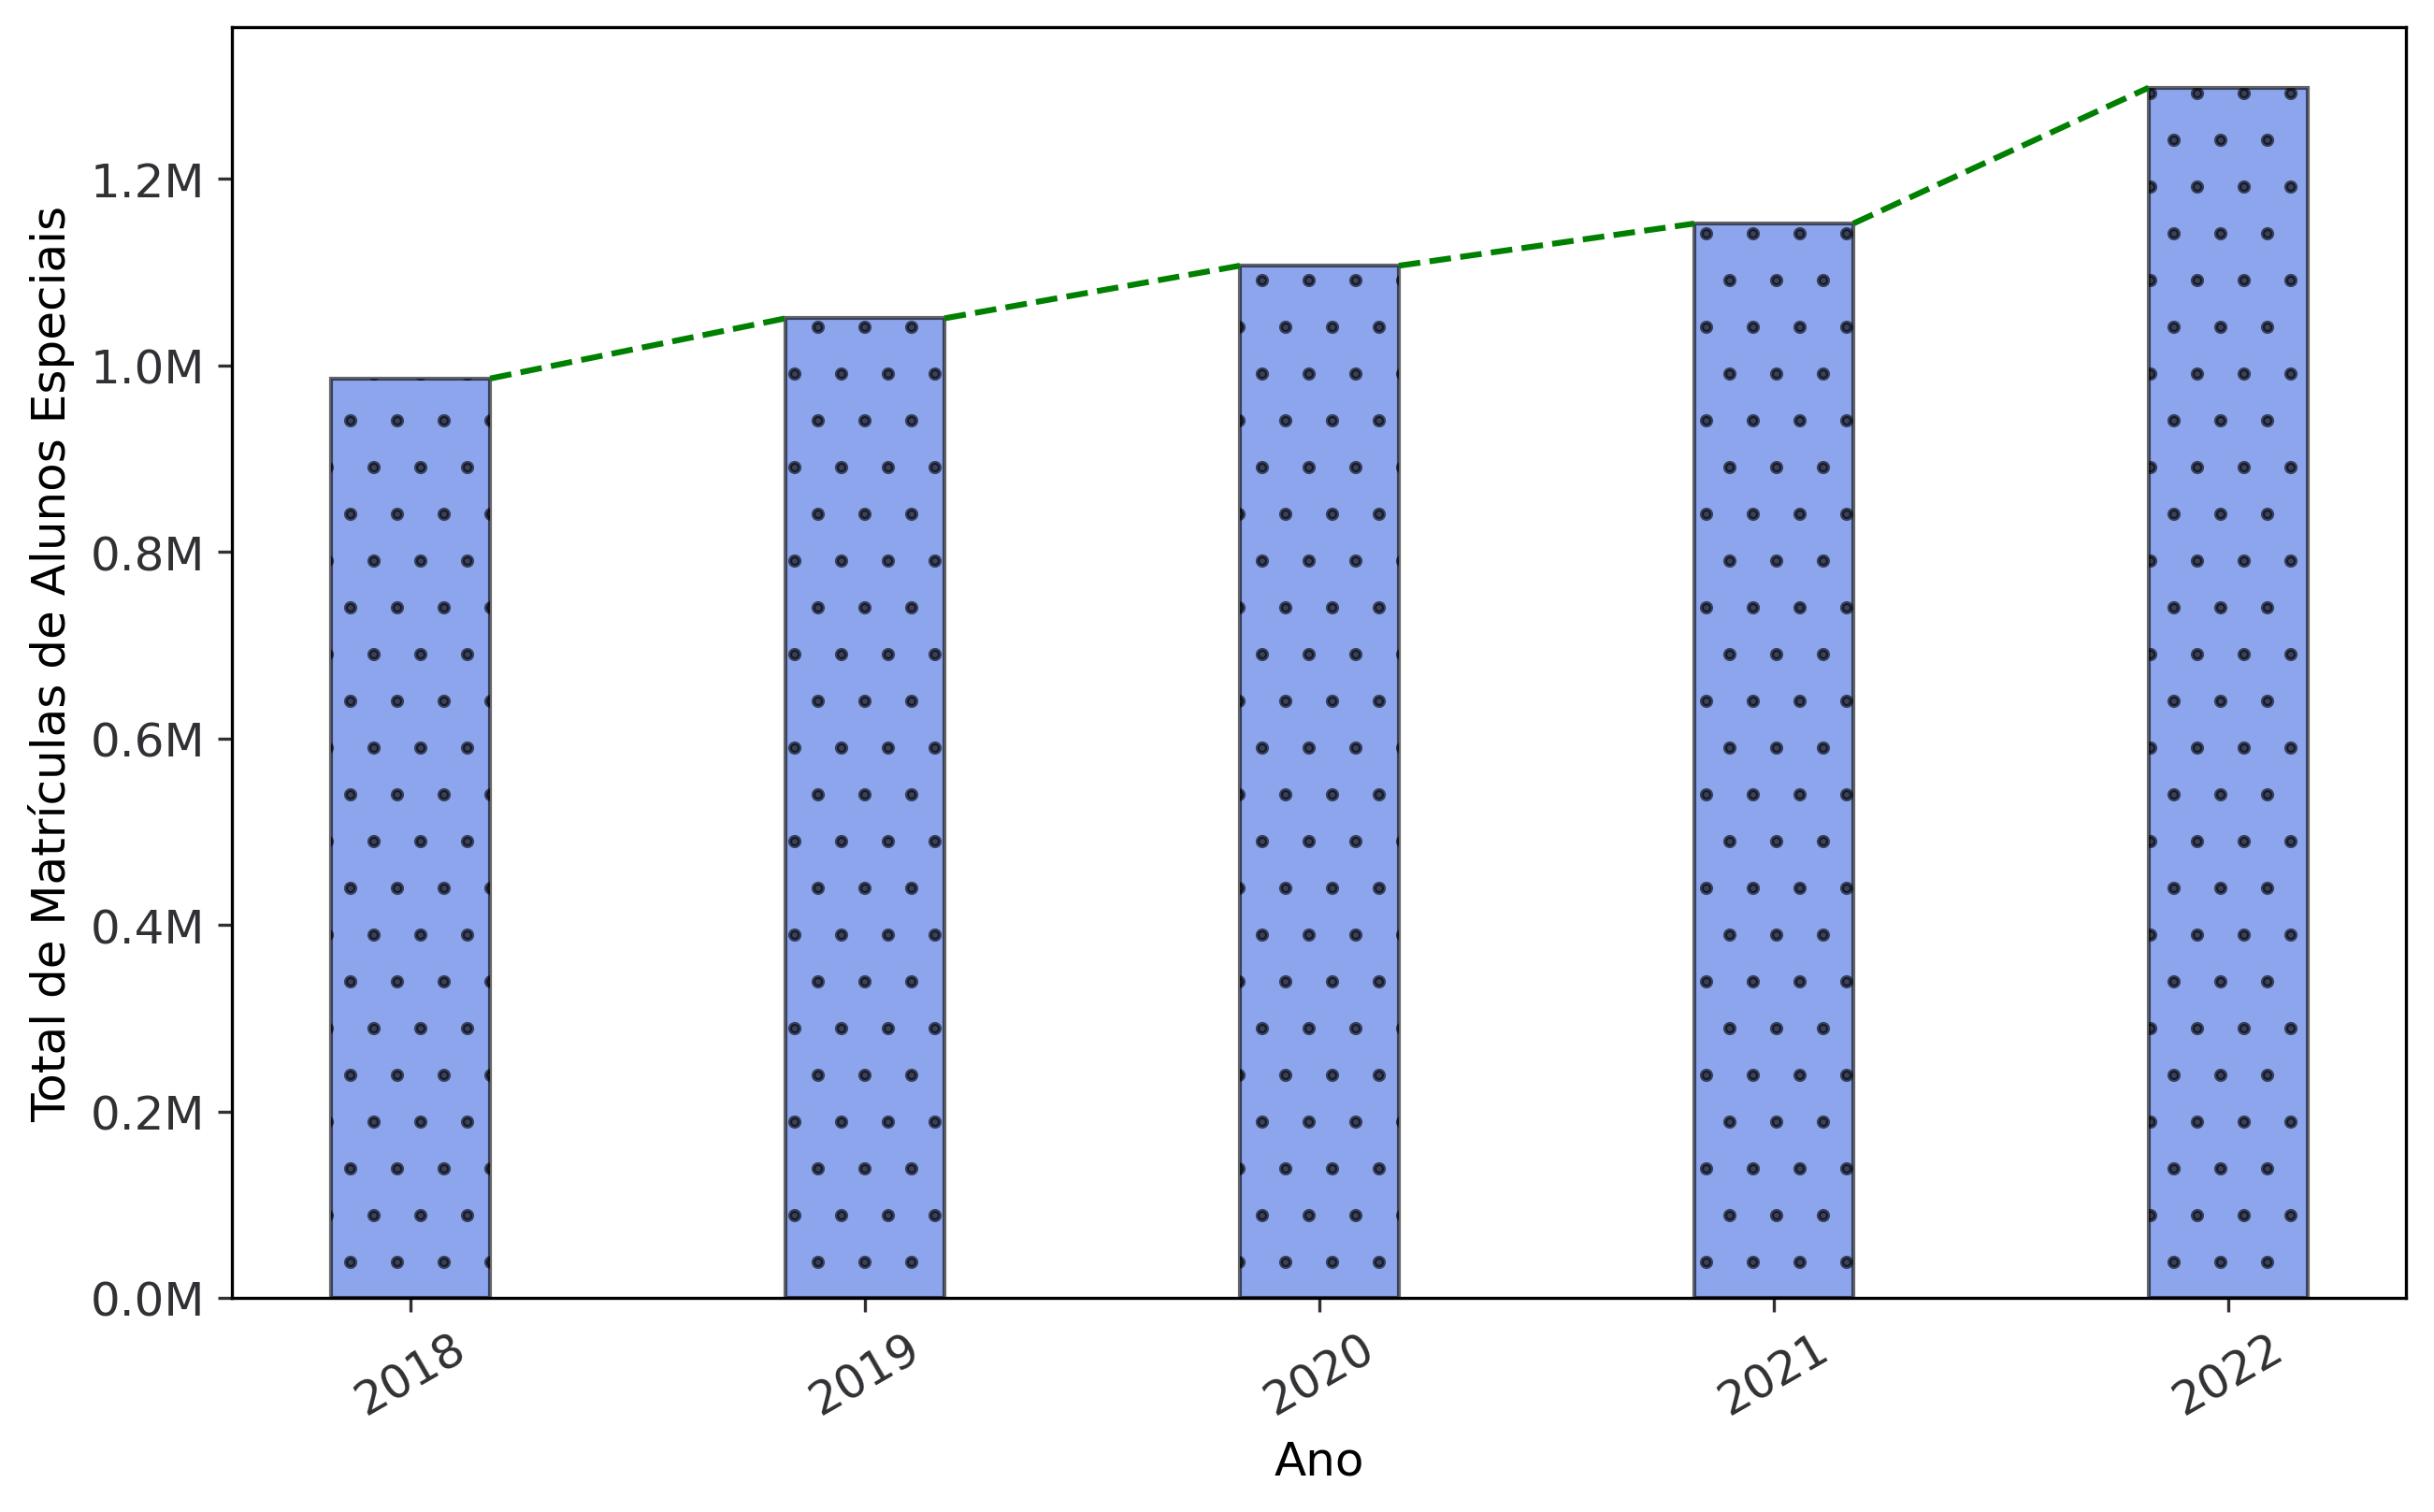

<Figure size 1800x1200 with 0 Axes>

In [ ]:
def millions(x, pos):
  'The two args are the value and tick position'
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig = plt.figure()
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(formatter)

aux['QT_MAT_ESP'] = aux['QT_MAT_ESP'].fillna(0)
agrupado_matrs_especiais = aux.groupby(['ANO']).agg({'QT_MAT_ESP': 'sum'})

agrupado_matrs_especiais.reset_index(inplace=True)
print(agrupado_matrs_especiais)


ax.bar(agrupado_matrs_especiais['ANO'].tolist(), agrupado_matrs_especiais['QT_MAT_ESP'].tolist(),
       ec = "k", alpha = .6, color = "royalblue", width=0.35, hatch=".")
# set x and y axis labels 
plt.xlabel('Ano')
plt.ylabel('Total de Matrículas de Alunos Especiais')
#plt.ylim(30000000,40000000)

order = agrupado_matrs_especiais['ANO'].tolist()
width = ax.patches[0].get_width()
stacks = len(ax.patches) // len(order)

for i in range(stacks):
  for j in range(0, len(order) - 1):
    h0 = np.sum([ax.patches[j + len(order) * k].get_height() for k in range(0, i + 1)])
    h1 = np.sum([ax.patches[j + 1 + len(order) * k].get_height() for k in range(0, i + 1)])

    print(h1)

    ax.plot([order[j] + width / 2, order[j] + 1 - width / 2], [h0, h1], color='green', ls='--', zorder=1)

plt.xticks(rotation=30, horizontalalignment="center")
#plotdata['pies'].plot(kind="barh")
plt.show()
#plt.savefig("4. Total de Matrículas de alunos especiais nas publicas.png", dpi=300)



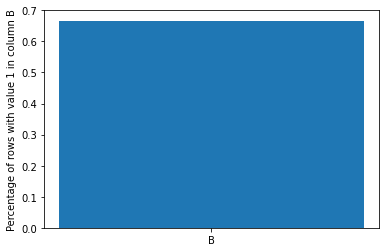

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create example dataframe
df = pd.DataFrame({
    'A': [1, 0, 1, 0, 1, 1],
    'B': [1, 0, 0, 1, 1, 1]
})

# calculate percentage of rows with value 1 in column B
b_pct = df[df['B'] == 1]['B'].count() / df.shape[0]

# create bar plot
plt.bar(['B'], [b_pct])
plt.ylabel('Percentage of rows with value 1 in column B')
plt.show()

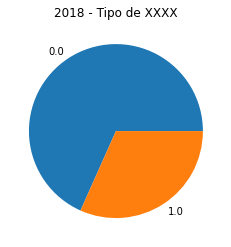

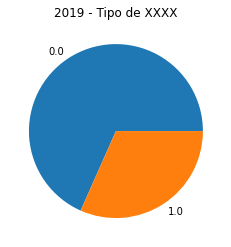

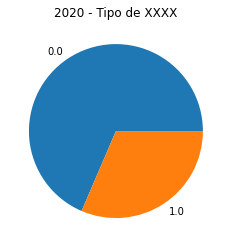

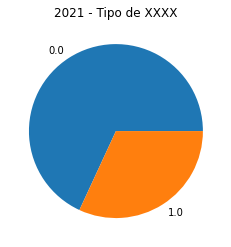

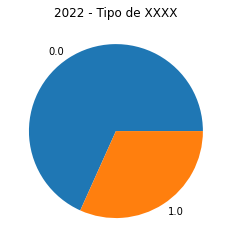

In [ ]:
'''
  Tenta plotar o percentual por estrutura física
'''
# ans = aux.groupby(['IN_LOCAL_FUNC_PREDIO_ESCOLAR','TP_OCUPACAO_PREDIO_ESCOLAR'])
# ans.size()
def somaMatrsAux(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

aux['QT_MAT_BAS_FEM'] = aux['QT_MAT_BAS_FEM'].fillna(0)
aux['QT_MAT_BAS_MASC'] = aux['QT_MAT_BAS_MASC'].fillna(0)
agrupado_matrs = aux.groupby(['ANO']).agg({'QT_MAT_BAS_FEM': 'sum', 'QT_MAT_BAS_MASC': 'sum'})
if 'TOTAL_MATRS' not in agrupado_matrs.columns:
  print("Adding total de matriculas...")
  agrupado_matrs['TOTAL_MATRS'] = agrupado_matrs.apply(somaMatrsAux, axis=1)

agrupado_matrs.reset_index(inplace=True)
print(agrupado_matrs)

for ano in aux['ANO'].unique():
  f_aux = aux[aux['ANO'] == ano]
  tot = f_aux['IN_BIBLIOTECA'].value_counts()

  # plot pie chart
  plt.pie(tot, labels=tot.index)
  plt.title(f'{ano} - Tipo de XXXX')
  plt.show()

3
3
[[ 1.   0.2  0.2]
 [ 0.2  1.  -0.2]
 [ 0.2 -0.2  1. ]]


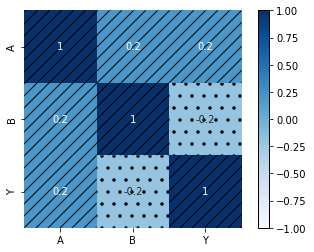

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# create sample data
data = {'A': [0, 0, 1, 0, 1, 1, 1, 0, 0, 1],
        'B': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1],
        'Y': [0, 0, 1, 0, 1, 0, 1, 1, 1, 0]}
df = pd.DataFrame(data)

# compute correlation matrix
corr_matrix = df.corr()

# se precisar só de um lado do triangulo, add o mask
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# plot heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1,
                 cbar=True, square=True) ## remove a barra lateral cbar=False
##ax.patch.set_hatch('//')
ax.collections[0].colorbar.outline.set_linewidth(1) # make outline visible

zm = np.ma.masked_less(corr_matrix.values, 0.19)
x= np.arange(len(corr_matrix.columns)+1)
y= np.arange(len(corr_matrix.index)+1)
plt.pcolor(x, y, zm, hatch='//', alpha=0.)

zm = np.ma.masked_greater(corr_matrix.values, -0.19)
plt.pcolor(x, y, zm, hatch='.', alpha=0.)
print(len(corr_matrix.index))
print(len(corr_matrix.columns))
print(corr_matrix.values)

'''
values = df.values
vmin = -1
vmax = 1
patterns = ['', 'oo', '////', 'XXX']
x = np.arange(df.shape[1] + 1)
y = np.arange(df.shape[0] + 1)
handles = []
norm = plt.Normalize(vmin, vmax)
cmap = plt.get_cmap('coolwarm')
bounds = np.linspace(vmin, vmax, len(patterns) + 1)
bounds[-1] += 0.00
print(y)
for pattern, b0, b1 in zip(patterns, bounds[:-1], bounds[1:]):
  ax.pcolor(x, y, np.where((values >= b0) & (values < b1), values, np.nan), cmap=cmap, norm=norm,
    hatch=pattern, ec='black', lw=1)
  handles.append(plt.Rectangle((0, 0), 0, 0, color=cmap(norm((b0 + b1) / 2)), ec='black',
    hatch=pattern, label=f'{b0:5.2f}-{b1:5.2f}'))
ax.hlines(y, 0, x.max(), color='w', lw=2)
ax.vlines(x, 0, y.max(), color='w', lw=2)
ax.legend(handles=handles, bbox_to_anchor=(1.01, 1.02), loc='upper left',
          handlelength=2, handleheight=2, frameon=False)
'''
plt.show()

#mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
#heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
'''
  Usa apenas as que tão em funcionamento e só as públicas
  aux contem o concatenado dos 5 anos
'''
'''
  Pre processa os dados
'''
del data_2020
gc.collect()

## 1. Exclui quem não tá em funcionamento
## ans = data_2021.groupby('TP_SITUACAO_FUNCIONAMENTO')
## ans.size()
aux = aux[aux.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]


## 2. Troca 1,2,3 no TP_dependencia pra publico e 4 pra privado
def changeDependency(dep):
  deps = [1,2,3]    ## tipos de dep pública
  if dep in deps:
    return 'Pública'
  else:
    return 'Privada'

if 'TP_DEPENDENCIA_STR' not in aux.columns:
    print("Mudando a tp dependencia da escola 2021...")
    aux['TP_DEPENDENCIA_STR'] = aux['TP_DEPENDENCIA'].apply(changeDependency)


## 3. Exclui as privadas
## ans = data_2021.groupby('TP_DEPENDENCIA_STR')
## ans.size()
aux = aux[aux.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]


## 4. Junta o total de matrículas em uma nova variável
def somaMatrs(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

if 'TOTAL_MATRS' not in aux.columns:
  print("Adding total de matriculas 2021")
  aux['TOTAL_MATRS'] = aux.apply(somaMatrs, axis=1)

print(len(aux.index))

In [ ]:
print("Dados 2021: ", len(data_2021.index))
print("Dados 2022: ", len(data_2022.index))
# print(data_2022.head(2))

'''
  Pre processa os dados
'''
## 1. Exclui quem não tá em funcionamento
## ans = data_2021.groupby('TP_SITUACAO_FUNCIONAMENTO')
## ans.size()
data_2021 = data_2021[data_2021.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_SITUACAO_FUNCIONAMENTO'] == 1, axis=1)]


## 2. Troca 1,2,3 no TP_dependencia pra publico e 4 pra privado
def changeDependency(dep):
  deps = [1,2,3]    ## tipos de dep pública
  if dep in deps:
    return 'Pública'
  else:
    return 'Privada'

if 'TP_DEPENDENCIA_STR' not in data_2021.columns:
    print("Mudando a tp dependencia da escola 2021...")
    data_2021['TP_DEPENDENCIA_STR'] = data_2021['TP_DEPENDENCIA'].apply(changeDependency)

if 'TP_DEPENDENCIA_STR' not in data_2022.columns:
    print("Mudando a tp dependencia da escola 2022...")
    data_2022['TP_DEPENDENCIA_STR'] = data_2022['TP_DEPENDENCIA'].apply(changeDependency)


## 3. Exclui as privadas
## ans = data_2021.groupby('TP_DEPENDENCIA_STR')
## ans.size()
data_2021 = data_2021[data_2021.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]
data_2022 = data_2022[data_2022.apply(lambda x: x['TP_DEPENDENCIA_STR'] == 'Pública', axis=1)]


## 4. Junta o total de matrículas em uma nova variável
def somaMatrs(row):
    return row['QT_MAT_BAS_FEM'] + row['QT_MAT_BAS_MASC']

# Use apply to create a new column that sums A and B
if 'TOTAL_MATRS' not in data_2021.columns:
  print("Adding total de matriculas 2021")
  data_2021['TOTAL_MATRS'] = data_2021.apply(somaMatrs, axis=1)

if 'TOTAL_MATRS' not in data_2022.columns:
  print("Adding total de matriculas 2022")
  data_2022['TOTAL_MATRS'] = data_2022.apply(somaMatrs, axis=1)
'''
  Fim Pre processamento dos dados
'''


print(data_2022["TP_DEPENDENCIA"].head(5))
# print(list(data_2022.columns))

Dados 2021:  180057
Dados 2022:  184332
Adding total de matriculas 2021
Adding total de matriculas 2022
0    2
1    2
2    3
3    3
4    3
Name: TP_DEPENDENCIA, dtype: int64


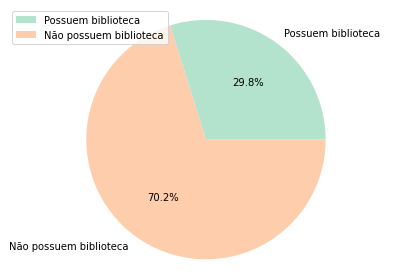

In [ ]:
sns.set_palette(sns.color_palette("Pastel2"))

labels = ['Possuem biblioteca', 'Não possuem biblioteca']
values = [65982, 155158] ## total = 221140

fig, ax = plt.subplots()
patches, texts, x = ax.pie(values, labels=labels, autopct='%1.1f%%')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.savefig("PieChart.png", dpi=240)
plt.show()

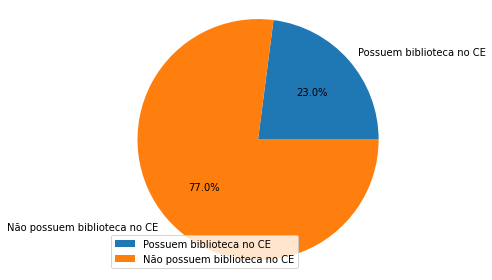

In [ ]:
ans = data.groupby(['NO_UF']).count()
ans

## 10654 3174

labels = ['Possuem biblioteca no CE', 'Não possuem biblioteca no CE']
values = [3174, 10654] ## total = 221140

fig, ax = plt.subplots()
patches, texts, x = ax.pie(values, labels=labels, autopct='%1.1f%%')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.savefig("PieChart-CEARA.png", dpi=240)
plt.show()

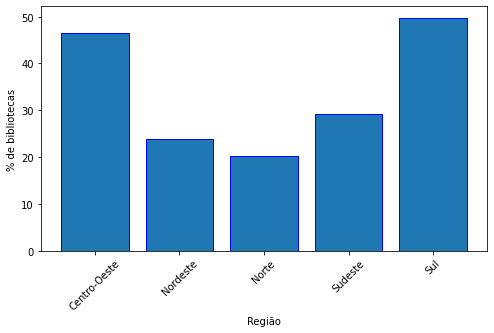

In [ ]:
## plot o de barras por regiao
# regiao = 

ans = data.groupby(['NO_REGIAO']).count()
regiao = ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
qtd_biblios = [5411, 18926, 5287, 21930, 14428]
tot_values = [11659,79039,26095,75329,29018]
values = [ (qtd_biblios[i]/tot_values[i])*100.0 for i in range(len(tot_values))]

fig, ax = plt.subplots(figsize =(8, 4.5))

ax.bar(regiao, values, edgecolor='blue')
plt.xlabel('Região')
plt.ylabel('% de bibliotecas')
plt.xticks(rotation=45)

plt.savefig("BarPlot-Regiao.png", dpi=240)
plt.show()

In [ ]:
!pip install geopandas
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#aux = aux[ aux.apply(lambda x: x['ANO'] == 2022, axis=1) ]
#print( aux.groupby(['ANO'])['SG_UF'].value_counts(normalize=True).rename('Percentage').reset_index() )
print( aux.groupby(['ANO'])['IN_ACESSIBILIDADE_INEXISTENTE'].value_counts().rename('Percentage').reset_index() )
# ans = ans[ans['ANO'] == 2022]

    ANO  IN_ACESSIBILIDADE_INEXISTENTE  Percentage
0  2022                            0.0       87939
1  2022                            1.0       50375


In [ ]:
# teste = aux.groupby(['SG_UF']).count()
#aux = aux[ aux.apply(lambda x: x['ANO'] == 2022, axis=1) ]
# ans = aux.groupby(['ANO'])['SG_UF'].value_counts(normalize=True).rename('Percentage').reset_index()

#fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ans = aux.groupby(['SG_UF']).count()
ansTotal = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
# ans
dataWithBiblios = aux[ (aux['IN_ACESSIBILIDADE_INEXISTENTE'] == 1) ]
ans = dataWithBiblios.groupby(['SG_UF']).count()
ansBiblios = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
ansBiblios.rename(columns = {'NU_ANO_CENSO':'QTD_ACESSIBILIDADE_INEX'}, inplace = True)
extractBiblios = ansBiblios['QTD_ACESSIBILIDADE_INEX']
ansTotal = ansTotal.join(extractBiblios)

def uf_percent(v1, v2):
  return 100.0 - ((v2/v1) * 100.0)

ansTotal['UF_PERCENT'] = ansTotal.apply(lambda x: uf_percent(x['NU_ANO_CENSO'], x['QTD_ACESSIBILIDADE_INEX']), axis=1)

print(ansTotal)
print( ansTotal['QTD_ACESSIBILIDADE_INEX'].sum() )
#print( aux.groupby(['ANO'])['SG_UF'].value_counts(normalize=True).rename('Percentage').reset_index() )

       NU_ANO_CENSO  QTD_ACESSIBILIDADE_INEX  UF_PERCENT
SG_UF                                                   
AC             1487                      937   36.987223
AL             2357                      696   70.470938
AM             5084                     3594   29.307632
AP              784                      397   49.362245
BA            13339                     6045   54.681760
CE             5913                     1309   77.862337
DF              708                       62   91.242938
ES             2694                      648   75.946548
GO             3512                      570   83.769932
MA            10417                     5393   48.228857
MG            11987                     3680   69.300075
MS             1354                      264   80.502216
MT             2271                      572   74.812858
PA             9685                     5080   47.547754
PB             3836                     1193   68.899896
PE             5937            

In [ ]:
## porcentagem dos valores por regiao
## values
# !pip install geopandas
import geopandas as gpd
import plotly.express as px


#plt.rcParams.update({"font.size": 5})

#fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ans = data.groupby(['SG_UF']).count()
ansTotal = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
# ans
dataWithBiblios = data[ (data['IN_BIBLIOTECA']>0.1) ]
ans = dataWithBiblios.groupby(['SG_UF']).count()
ansBiblios = ans.drop(ans.columns[ [ i for i in range(1,len(ans.columns))] ],axis = 1)
ansBiblios.rename(columns = {'NU_ANO_CENSO':'QTD_BIBLIOS'}, inplace = True)
extractBiblios = ansBiblios['QTD_BIBLIOS']
ansTotal = ansTotal.join(extractBiblios)

def uf_percent(v1, v2):
  return (v2/v1) * 100.0

ansTotal['UF_PERCENT'] = ansTotal.apply(lambda x: uf_percent(x['NU_ANO_CENSO'], x['QTD_BIBLIOS']), axis=1)

print(ansTotal)


       NU_ANO_CENSO  QTD_BIBLIOS  UF_PERCENT
SG_UF                                       
AC             1734           92    5.305652
AL             3435          883   25.705968
AM             6251         1339   21.420573
AP              934          258   27.623126
BA            20156         4652   23.079976
CE            10654         3174   29.791628
DF             1407          474   33.688699
ES             4035         1271   31.499380
GO             5152         2726   52.911491
MA            14162         1935   13.663324
MG            24023         9688   40.328019
MS             1889          773   40.921122
MT             3211         1438   44.783557
PA            12395         2092   16.877773
PB             5638         1507   26.729337
PE            10509         3566   33.932819
PI             6645         1154   17.366441
PR            10079         5312   52.703641
RJ            13282         5253   39.549767
RN             5293         1535   29.000567
RO        

In [ ]:
dados_cidade

,codigo_uf,uf,nome,latitude,longitude,regiao
0,11,RO,Rondônia,-10.83,-63.34,Norte
1,12,AC,Acre,-8.77,-70.55,Norte
2,13,AM,Amazonas,-3.47,-65.10,Norte
3,14,RR,Roraima,1.99,-61.33,Norte
4,15,PA,Pará,-3.79,-52.48,Norte
5,16,AP,Amapá,1.41,-51.77,Norte
6,17,TO,Tocantins,-9.46,-48.26,Norte
7,21,MA,Maranhão,-5.42,-45.44,Nordeste
8,22,PI,Piauí,-6.60,-42.28,Nordeste
9,23,CE,Ceará,-5.20,-39.53,Nordeste


In [ ]:
ansTotal['SG_UF'] = ansTotal.index
ID_UF = [12,27,13,16,29,23,53,32,52,21,31,50,51,15,25,26,22,41,33,24,11,14,43,42,28,35,17]
ansTotal.loc[:,'CD_GEOCUF'] = ID_UF
ansTotal

#[12,27,13,16,29,23,53,32,52,21,31,50,51,15,25,26,22,41,33,24,11,14,43,42,28,35,17]

,NU_ANO_CENSO,QTD_ACESSIBILIDADE_INEX,UF_PERCENT,SG_UF,CD_GEOCUF
SG_UF,,,,,
AC,1487,937,36.987223,AC,12
AL,2357,696,70.470938,AL,27
AM,5084,3594,29.307632,AM,13
AP,784,397,49.362245,AP,16
BA,13339,6045,54.681760,BA,29
CE,5913,1309,77.862337,CE,23
DF,708,62,91.242938,DF,53
ES,2694,648,75.946548,ES,32
GO,3512,570,83.769932,GO,52


In [ ]:
EMPREGO_CARTEIRA = [87812,375005,448372,70492,1821479,1198244,843246,784544,1340313,529208,4342536,572949,806316,821882,
                    431929,1293089,302392,2859890,3256110,438871,249891,65078,2603803,2314455,284212,12783236,201298]
BENEFICIARIOS =    [109254,482948,476634,96972,2211315,1299297,118089,269557,407918,1100451,1433196,178107,222197,
                    1148414,612051,1427915,540622,535536,1324999,437717,103566,59736,514855,186943,347319,2225382,146499]

ansTotal.loc[:,'EMPREGO_CARTEIRA'] = EMPREGO_CARTEIRA
ansTotal.loc[:,'BENEFICIARIOS'] = BENEFICIARIOS

def proporcao(v1, v2):
  return (v2/v1) * 100.0

ansTotal['PROPORCAO_CART_BENEF'] = ansTotal.apply(lambda x: proporcao(x['EMPREGO_CARTEIRA'], x['BENEFICIARIOS']), axis=1)

ansTotal

#[12,27,13,16,29,23,53,32,52,21,31,50,51,15,25,26,22,41,33,24,11,14,43,42,28,35,17]

,NU_ANO_CENSO,QTD_BIBLIOS,UF_PERCENT,SG_UF,CD_GEOCUF,EMPREGO_CARTEIRA,BENEFICIARIOS,PROPORCAO_CART_BENEF
SG_UF,,,,,,,,
AC,1734,92,5.305652,AC,12,87812,109254,124.418075
AL,3435,883,25.705968,AL,27,375005,482948,128.784416
AM,6251,1339,21.420573,AM,13,448372,476634,106.303248
AP,934,258,27.623126,AP,16,70492,96972,137.564546
BA,20156,4652,23.079976,BA,29,1821479,2211315,121.402168
CE,10654,3174,29.791628,CE,23,1198244,1299297,108.433424
DF,1407,474,33.688699,DF,53,843246,118089,14.004098
ES,4035,1271,31.499380,ES,32,784544,269557,34.358430
GO,5152,2726,52.911491,GO,52,1340313,407918,30.434533


In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import plotly

# https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json
with urlopen('https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json') as response:
    counties = json.load(response)

# 'properties': {'NM_ESTADO': 'ACRE', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '12'}}

fig = go.Figure()
# Criando o mapa
teste = px.choropleth_mapbox(
    data_frame = ansTotal, 
    geojson = counties, 
    locations='CD_GEOCUF', 
    featureidkey='properties.CD_GEOCUF',
    color='UF_PERCENT',
    color_continuous_scale= 'Ylgnbu',
    range_color=(0, 100),
    mapbox_style='open-street-map',
    zoom=3.0, 
    # -15.83;-47.86
    #center = {"lat": -17.14, "lon": -57.33},
    center = {"lat": -15.83, "lon": -47.86},
    opacity=0.5,
    labels={'UF_PERCENT':'% de Acessibilidades das Escolas Públicas', 
            'id' : 'Código do município'
    },
    width = 1000,
    height = 800,
    title = 'Taxa de Existência de alguma Infraestrutura de Acessibilidade das Escolas Públicas por Estado'
)

# Ajustando as margens
teste.update_layout(margin={'r':0,'t':0,'l':0, 'b':0})

# Reduzindo a largura das bordas dos municípios
teste.update_traces(marker_line_width=0.91)

# Exibindo o mapa
plt.tight_layout()
plotly.offline.plot(teste, filename='mapa.html')
teste.show()

<Figure size 1800x1200 with 0 Axes>

In [ ]:
fig.write_image("mapa2.png")

In [ ]:
# !pip install imgkit
import imgkit

imgkit.from_file('mapa.html', 'mapa.jpg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


OSError: ignored

In [ ]:
counties["features"][0]['properties'].keys()

dict_keys(['NM_ESTADO', 'NM_REGIAO', 'CD_GEOCUF'])

In [ ]:
for i in range(len(counties["features"])):
    print(counties["features"][i]["properties"])

{'NM_ESTADO': 'ACRE', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '12'}
{'NM_ESTADO': 'ALAGOAS', 'NM_REGIAO': 'NORDESTE', 'CD_GEOCUF': '27'}
{'NM_ESTADO': 'AMAPÁ', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '16'}
{'NM_ESTADO': 'AMAZONAS', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '13'}
{'NM_ESTADO': 'BAHIA', 'NM_REGIAO': 'NORDESTE', 'CD_GEOCUF': '29'}
{'NM_ESTADO': 'CEARÁ', 'NM_REGIAO': 'NORDESTE', 'CD_GEOCUF': '23'}
{'NM_ESTADO': 'DISTRITO FEDERAL', 'NM_REGIAO': 'CENTRO-OESTE', 'CD_GEOCUF': '53'}
{'NM_ESTADO': 'ESPÍRITO SANTO', 'NM_REGIAO': 'SUDESTE', 'CD_GEOCUF': '32'}
{'NM_ESTADO': 'GOIÁS', 'NM_REGIAO': 'CENTRO-OESTE', 'CD_GEOCUF': '52'}
{'NM_ESTADO': 'MARANHÃO', 'NM_REGIAO': 'NORDESTE', 'CD_GEOCUF': '21'}
{'NM_ESTADO': 'MATO GROSSO', 'NM_REGIAO': 'CENTRO-OESTE', 'CD_GEOCUF': '51'}
{'NM_ESTADO': 'MATO GROSSO DO SUL', 'NM_REGIAO': 'CENTRO-OESTE', 'CD_GEOCUF': '50'}
{'NM_ESTADO': 'MINAS GERAIS', 'NM_REGIAO': 'SUDESTE', 'CD_GEOCUF': '31'}
{'NM_ESTADO': 'PARÁ', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '15'}
{'NM_EST

In [ ]:
import folium

mapa_folium = folium.Map(
    width = 800, 
    height = 600,
    # -15.83, "lon": -47.86 
    location = [-15.83, -47.86], 
    zoom_start = 4, 
    tiles = "cartodbpositron"
)

mapa = folium.Choropleth(
    geo_data = counties,
    name ='choropleth',
    data = ansTotal,
    columns = ['SG_UF','UF_PERCENT'],
    key_on = 'Feature.properties',
    fill_color = 'Reds',
    fill_opacity = 1.0,
    line_opacity = 0.9,
    line_color = 'grey', 
    line_weight = 0.25,
    legend_name = 'Taxa de Mortalidade por Covid-19, por municípios, 11/08/2022',
    highlight = True,
    reset = True 

).add_to(mapa_folium)

mapa_folium

AttributeError: ignored

In [ ]:
counties

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-66.81025311199988, -9.818045875999971],
      [-66.62671969099989, -9.898101245000014],
      [-66.9801989329999, -10.19431558399997],
      [-67.18033256799991, -10.339460113999955],
      [-67.3105100489999, -10.320922285999924],
      [-67.43572846299992, -10.446790359999959],
      [-67.57903554699993, -10.503396510999941],
      [-67.70493656899994, -10.699231594000015],
      [-67.86365695299992, -10.64042424799998],
      [-68.02089945199992, -10.650235292999955],
      [-68.27856039799994, -10.989313449999983],
      [-68.48718609799987, -11.050875333999933],
      [-68.54297139499988, -11.111355478999908],
      [-68.7161195959999, -11.145561466999943],
      [-68.84837791799994, -10.991446527999905],
      [-69.10253429099997, -10.979946979000022],
      [-69.40511791399997, -10.927407512999988],
      [-69.73920890699992, -10.963332661999981],
      [-69.

In [ ]:
## apenas 65982 das 221140 escolas tem bibliotecas 
ans = data.groupby(['NO_REGIAO','NO_UF']).count()

# len(data.index)
#ans = data[data['NO_REGIAO'] == 'NORDESTE']
#len(ans.index)
ans
#len(data.index)

NU_ANO_CENSO  CO_REGIAO  SG_UF  CO_UF  \
NO_REGIAO    NO_UF                                                        
Centro-Oeste Distrito Federal              474        474    474    474   
             Goiás                        2726       2726   2726   2726   
             Mato Grosso                  1438       1438   1438   1438   
             Mato Grosso do Sul            773        773    773    773   
Nordeste     Alagoas                       883        883    883    883   
             Bahia                        4652       4652   4652   4652   
             Ceará                        3174       3174   3174   3174   
             Maranhão                     1935       1935   1935   1935   
             Paraíba                      1507       1507   1507   1507   
             Pernambuco                   3566       3566   3566   3566   
             Piauí                        1154       1154   1154   1154   
             Rio Grande do Norte          1535       1535   1535   1535   
             Sergipe                       520        520    520    520   
Norte        Acre                           92         92     92     92   
             Amapá                         258        258    258    258   
             Amazonas                     1339       1339   1339   1339   
             Pará                         2092       2092   2092   2092   
             Rondônia                      593        593    593    593   
             Roraima                       238        238    238    238   
             Tocantins                     675        675    675    675   
Sudeste      Espírito Santo               1271       1271   1271   1271   
             Minas Gerais                 9688       9688   9688   9688   
             Rio de Janeiro               5253       5253   5253   5253   
             São Paulo                    5718       5718   5718   5718   
Sul          Paraná                       5312       5312   5312   5312   
             Rio Grande do Sul            5978       5978   5978   5978   
             Santa Catarina               3138       3138   3138   3138   

                                  NO_MUNICIPIO  CO_MUNICIPIO  NO_MESORREGIAO  \
NO_REGIAO    NO_UF                                                             
Centro-Oeste Distrito Federal              474           474             474   
             Goiás                        2726          2726            2726   
             Mato Grosso                  1438          1438            1438   
             Mato Grosso do Sul            773           773             773   
Nordeste     Alagoas                       883           883             883   
             Bahia                        4652          4652            4652   
             Ceará                        3174          3174            3174   
             Maranhão                     1935          1935            1935   
             Paraíba                      1507          1507            1507   
             Pernambuco                   3566          3566            3566   
             Piauí                        1154          1154            1154   
             Rio Grande do Norte          1535          1535            1535   
             Sergipe                       520           520             520   
Norte        Acre                           92            92              92   
             Amapá                         258           258             258   
             Amazonas                     1339          1339            1339   
             Pará                         2092          2092            2092   
             Rondônia                      593           593             593   
             Roraima                       238           238             238   
             Tocantins                     675           675             675   
Sudeste      Espírito Santo               1271          1271            1271   
             Minas

In [ ]:
ans = data.groupby(['NO_REGIAO']).count()
ans

,NU_ANO_CENSO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,NO_MICRORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
NO_REGIAO,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,5411,5411,5411,5411,5411,5411,5411,5411,5411,5411,...,5385,5385,5385,5385,5385,5385,5385,5385,5385,5385
Nordeste,18926,18926,18926,18926,18926,18926,18926,18926,18926,18926,...,18828,18828,18828,18828,18828,18828,18828,18828,18828,18828
Norte,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,...,5271,5271,5271,5271,5271,5271,5271,5271,5271,5271
Sudeste,21930,21930,21930,21930,21930,21930,21930,21930,21930,21930,...,21813,21813,21813,21813,21813,21813,21813,21813,21813,21813
Sul,14428,14428,14428,14428,14428,14428,14428,14428,14428,14428,...,14317,14317,14317,14317,14317,14317,14317,14317,14317,14317


In [ ]:
#data.drop(data.columns[[i for i in range(6, 360)]],axis=1,inplace=True)
ans = data.groupby(['NO_REGIAO','NO_UF']).count()
#ans
ans.to_csv('porRegiaoEUF.csv')